<font size = "5"> **Chapter 3:  [Imaging](Ch3-Imaging.ipynb)** </font>


<hr style="height:1px;border-top:4px solid #FF8200" />

# Analysis of Spectrum Images - Core-Loss

part of 

<font size = "5"> **[Analysis of Transmission Electron Microscope Data](_Analysis_of_Transmission_Electron_Microscope_Data.ipynb)**</font>


by Gerd Duscher, 2019

Microscopy Facilities<br>
Joint Institute of Advanced Materials<br>
The University of Tennessee, Knoxville

Model based analysis and quantification of data acquired with transmission electron microscopes


## Content

Plotting, Interacting and Quantifying Spectrum Image data

Please cite for core-loss quantification:

[M. Tian et  al. *Measuring the areal density of nanomaterials by electron energy-loss spectroscopy*
Ultramicroscopy Volume 196, 2019, pages 154-160](https://doi.org/10.1016/j.ultramic.2018.10.009)

as a reference of this quantification method.

## First we import the relevant packages

In [ ]:
import sys
!{sys.executable} -m pip install  --upgrade pyTEMlib 

In [1]:
# import matplotlib and numpy
#                       use "inline" instead of "notebook" for non-interactive plots
%pylab --no-import-all notebook
%gui qt

from scipy.ndimage.filters import gaussian_filter

# import pyTEMlib packages
import pyTEMlib
import file_tools  as ft     # File input/ output library
import EELS_tools  as eels 

# For archiving reasons it is a good idea to print the version numbers out at this point
print('pyTEM version: ',pyTEMlib.__version__)

Populating the interactive namespace from numpy and matplotlib
windows
pyTEM version:  0.2020.04.2


## Load and plot a spectrum

As an example we load the spectrum **1EELS Acquire (high-loss).dm3** from the *example data* folder.

Please see [Working with Spectrum Images](CH4-Working_with_Spectrum_Images.ipynb) for details on storage and plotting.

Found  spectrum_image  in dm3 file
OOPSY-Dasy that is not handled correctly
Cannot overwrite file. Using:  EELS Spectrum ImageFeAgA-1.hf5
Channel_000 :  EELS Spectrum ImageFeAgA-1


<IPython.core.display.Javascript object>


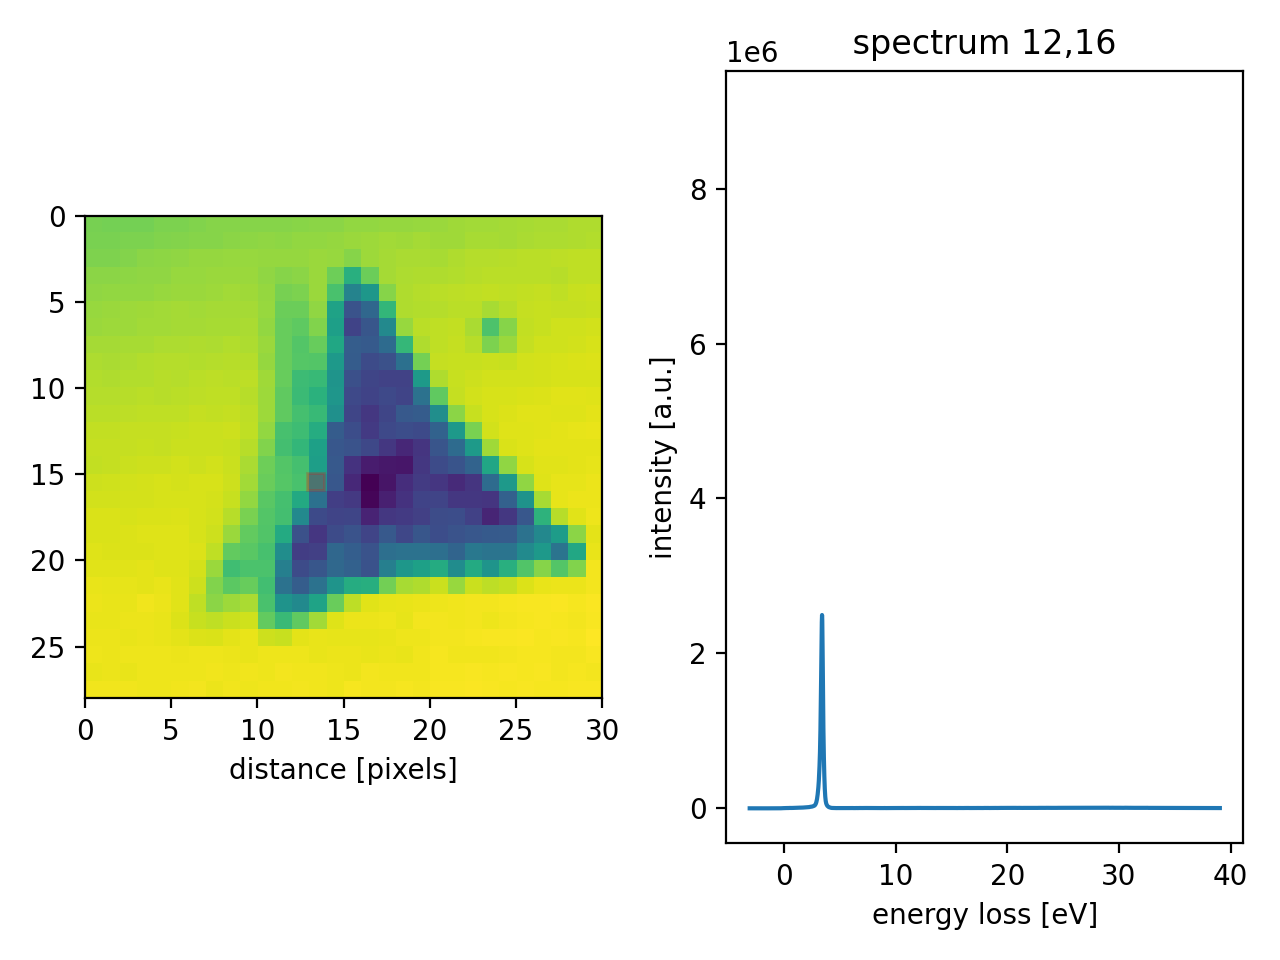

spectrum_image


In [172]:
import importlib
importlib.reload(ft)

# If a file is open, close it
try:
    h5_file.close()
except:
    pass
# Load new file
h5_file = ft.h5_open_file()#os.path.join(current_directory,filename))
current_channel = h5_file['Measurement_000/Channel_000']
measurement_group = h5_file['Measurement_000']


for key in list(measurement_group.keys()):
    if 'title' in measurement_group[key].keys(): 
        print(key,': ',measurement_group[key]['title'][()])
    else:
        print(key,': ')    
current_dataset = current_channel['nDim_Data']
                                        
view = ft.h5_plot(current_dataset)  # note this needs a view reference for interaction

In [4]:
for key in current_channel:
    if 'Log_' in key:
        print(key, current_channel[key]['analysis'][()])
h5_file.flush()

## Fix Energy Scale

If all spectra are shifted on the same energy-scale summation and comparison is just so much easier.

To shift the spectra,  we use [splev](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splev.html#scipy.interpolate.splev), and [splrep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splrep.html#scipy.interpolate.splrep) function of  [interpolate](https://docs.scipy.org/doc/scipy/reference/interpolate.html) package scipy .

C:\Users\gduscher\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:454: RuntimeWarning: Number of calls to function has reached maxfev = 2000.
  warnings.warn(errors[info][0], RuntimeWarning)


Log_000 Aligned SI


Box(children=(ToggleButton(value=False, description='fix_energy'), ToggleButton(value=False, description='fit_…

<IPython.core.display.Javascript object>


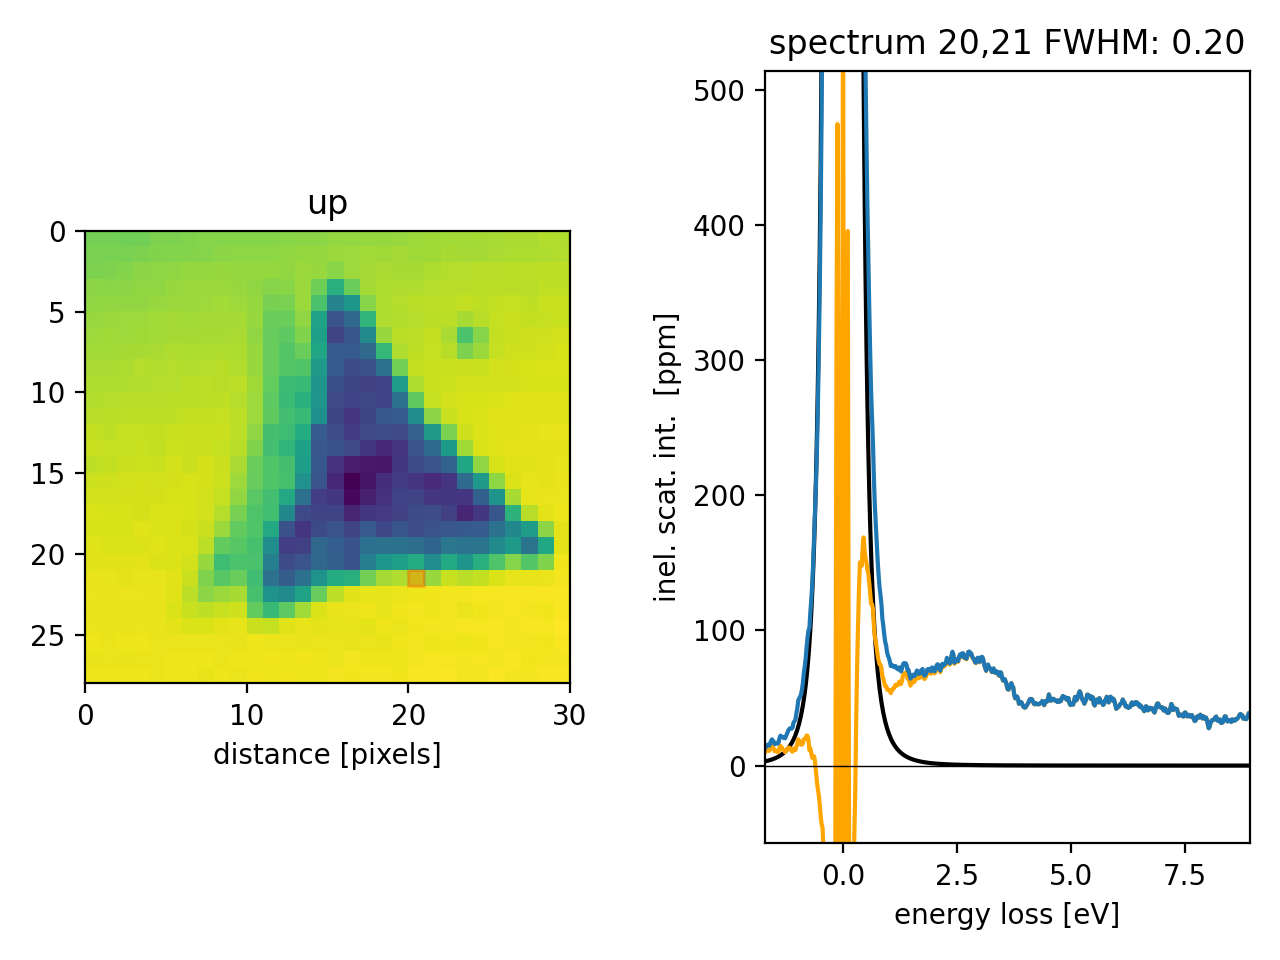

In [5]:
import EELS_tools  as eels 

import importlib
importlib.reload(ft)

spectrum_image = current_dataset
energy_scale = current_dataset.dims[2][0]

energy_shifts = eels.get_energy_shifts(spectrum_image, energy_scale, 0.35)
dispersion = energy_scale[1]-energy_scale[0]

if energy_shifts.min()> 0:
    shift = energy_shifts.max()
else:
    shift = energy_shifts.min()
master_energy_scale = np.arange(2048)*dispersion+energy_scale[0]-shift
shifted_SI = eels.shift_on_same_scale(spectrum_image,energy_shifts, energy_scale, master_energy_scale)

si_tags = {}

si_tags['data'] = shifted_SI
si_tags['data_type'] = 'spectrum_image'
si_tags['name'] = 'Aligned SI'

si_tags['new_energy_scale'] = master_energy_scale
si_tags['energy_shifts'] = energy_shifts

si_group = ft.add_spectrum_image(current_channel, si_tags)

for key in current_channel:
    if 'Log_' in key:
        print(key, current_channel[key]['analysis'][()])
h5_file.flush()

SI_plot= eels.interactive_spectrum_image(si_group['nDim_Data'], horizontal = True)
SI_plot.zero_loss_fit_width = 0.35
        

Box(children=(ToggleButton(value=False, description='fix_energy'), ToggleButton(value=False, description='fit_…

<IPython.core.display.Javascript object>


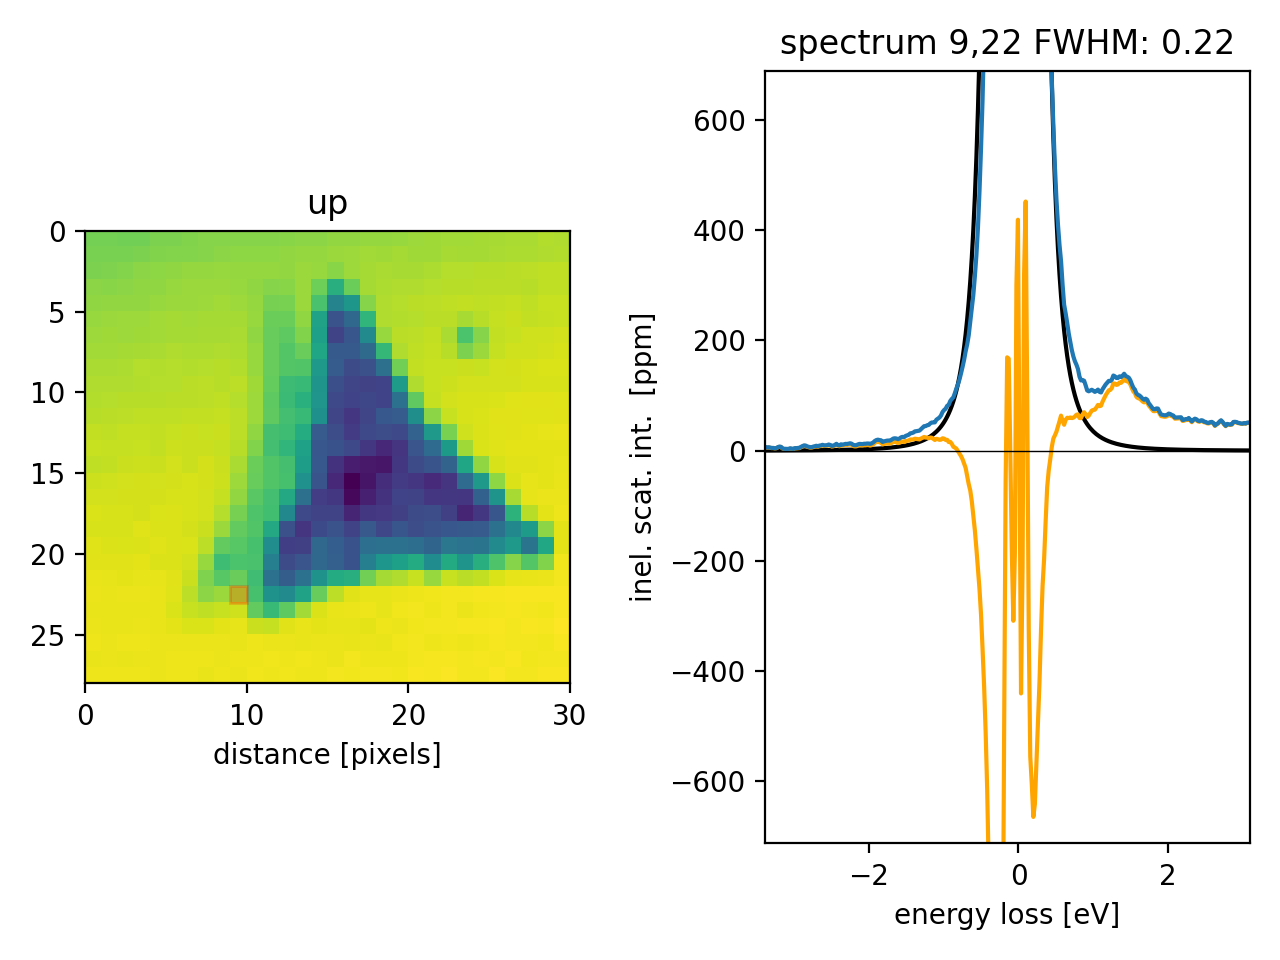

In [145]:
SI_plot= eels.interactive_spectrum_image(si_group['nDim_Data'], horizontal = True)
SI_plot.zero_loss_fit_width = 0.35
SI_plot.zero_loss_fit_width = 0.45

In [147]:
SI_plot.zero_loss_fit_width = 0.35

414
[ 452 1581]


<IPython.core.display.Javascript object>


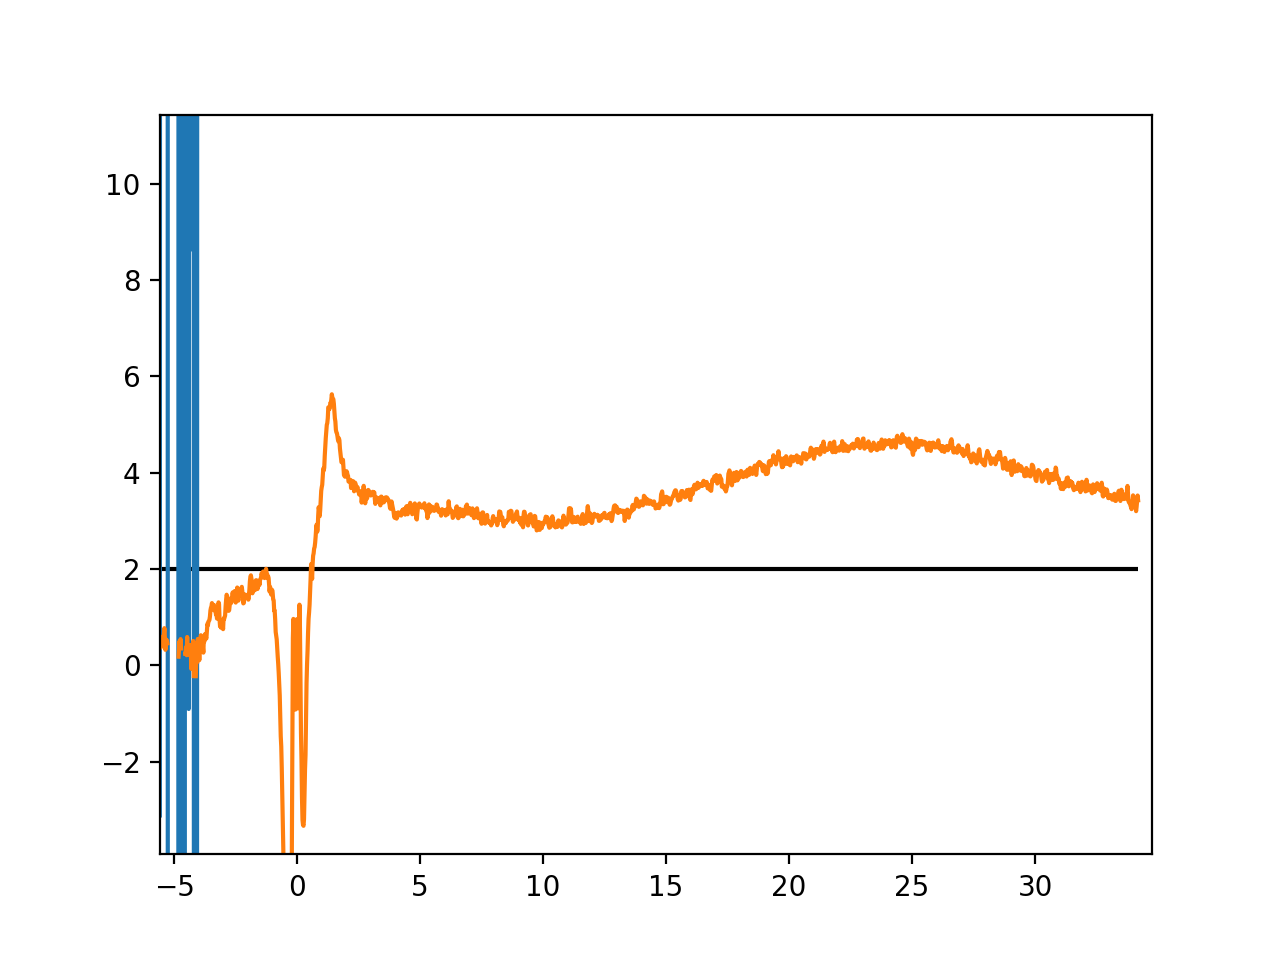

C:\Users\gduscher\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in sqrt


In [166]:
zero_loss_fit_width = 0.4
import importlib
importlib.reload(eels)

x_pos = 9
y_pos =22
current_dataset = si_group['nDim_Data']
spectrum = np.average(current_dataset[27:30,19:21,:], axis=(0,1))
spectrum = current_dataset[x_pos,y_pos]
energy_scale = current_dataset.dims[2][0]
zero_loss, pZL = eels.resolution_function(energy_scale, spectrum, zero_loss_fit_width)
        
from scipy.signal import find_peaks
start_fit = np.searchsorted(energy_scale,0.6)
print(start_fit)
blurred2 = gaussian_filter(spectrum[start_fit:], sigma=2)
peaks, _ = find_peaks(blurred2, prominence =900)
peaks = peaks+start_fit
print(peaks)

plt.figure()
plt.plot(energy_scale,spectrum, label='spectrum')
#plt.plot(energy_scale,current_dataset[28,20,:], label='spectrum')
#plt.plot(energy_scale,zero_loss, label='resolution')
plt.plot(energy_scale,(spectrum-zero_loss)/np.sqrt(spectrum)/20, label='difference')
plt.scatter(energy_scale[peaks], spectrum[peaks],c='red')

plt.gca().set_ylim(-10,200)#np.max(spectrum-zero_loss)/2)
#plt.gca().set_xlim(-5,10)
plt.hlines(2,energy_scale[0],energy_scale[-1])

Using 3 for fit
peak 	 position 	 amplitude 	 width
1   	   1.4    	   15050.0   	  0.3
2   	   0.6    	   10000.0   	  0.2
3   	   2.7    	   4413.0   	  1.0


<IPython.core.display.Javascript object>


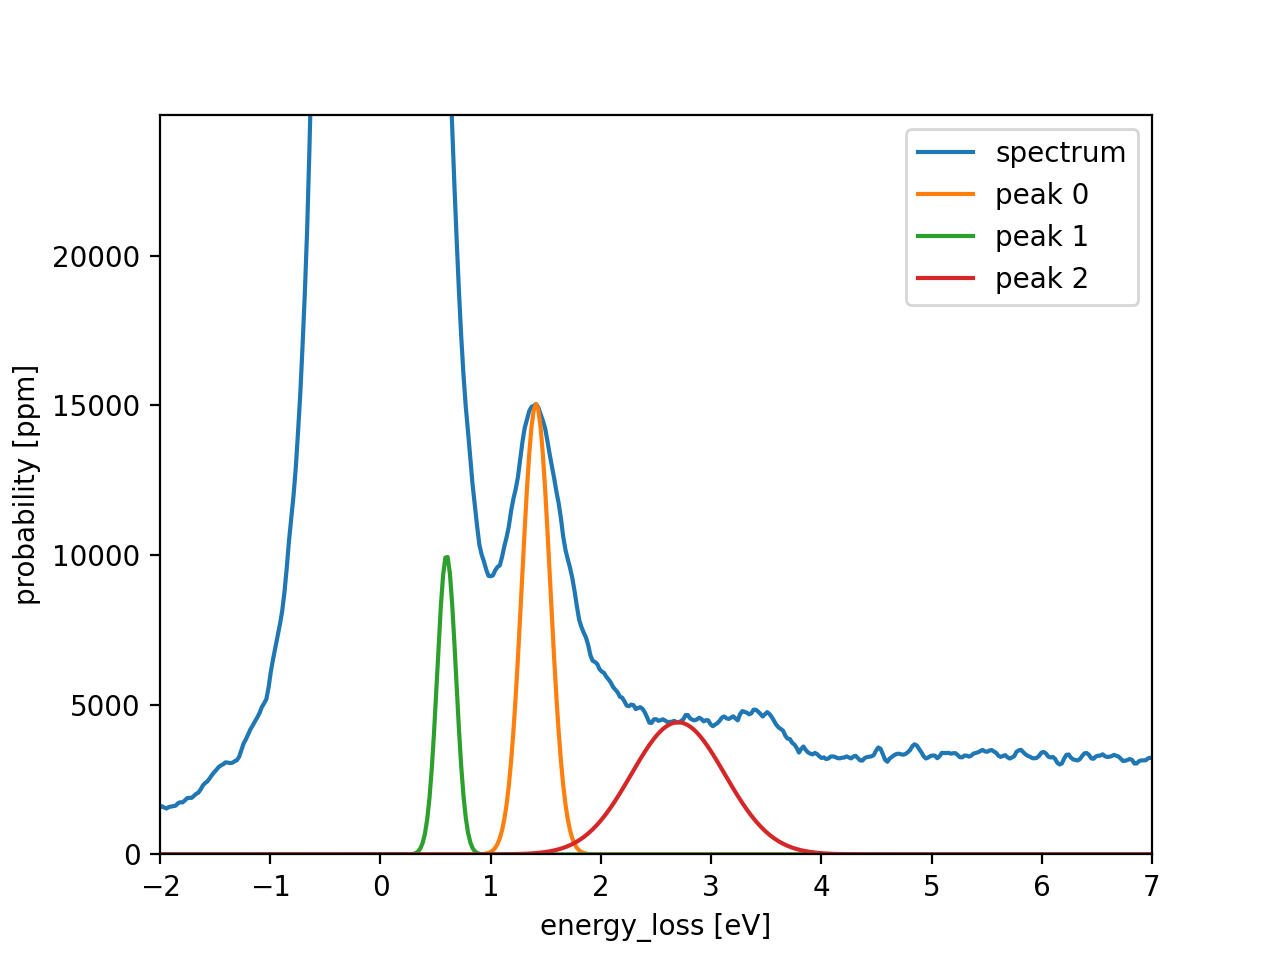

In [146]:
x = 28
y = 20
current_dataset = si_group['nDim_Data']

spectrum = np.average(current_dataset[x-1:x+1,y-1:y+1,:], axis=(0,1))
energy_scale = current_dataset.dims[2][0]
zero_loss, pZL = eels.resolution_function(energy_scale, spectrum, zero_loss_fit_width)


end_fit = np.searchsorted(energy_scale,5)
pin = []
for peak in peaks:
    if peak <end_fit:
        pin.append(energy_scale[peak])
        pin.append(spectrum[peak])
        pin.append(.3)

pin.append(.6)
pin.append(10000)
pin.append(.2)

pin.append(2.7)
pin.append(spectrum[np.searchsorted(energy_scale,2.7)])
pin.append(1)
pin_original = pin

number_of_peaks = int(len(pin)/3)            
print(f'Using {number_of_peaks} for fit')        

print(f'peak \t position \t amplitude \t width')
for i in range(number_of_peaks):
    print(f'{i+1}   \t   {pin[i*3]:.1f}    \t   {pin[i*3+1]:.1f}   \t  {pin[i*3+2]:.1f}')

def gauss(x, p): # p[0]==mean, p[1]= area p[2]==fwhm, 
    return p[1] * np.exp(-(x- p[0])**2/(2.0*( p[2]/2.3548)**2))

    
plt.figure()

plt.xlabel('energy_loss [eV]')
plt.ylabel('probability [ppm]')

plt.plot(energy_scale, spectrum, label='spectrum')
Gaussians = []
for i in range(number_of_peaks):
        plt.plot(energy_scale, gauss(np.array(energy_scale), pin[i*3:]), label=f'peak {i}')  

plt.xlim(-2,7)

#plt.ylim(0,np.max(spectrum-zero_loss)/2)
plt.gca().set_ylim(0,np.max(spectrum-zero_loss)/2)

plt.legend();


In [130]:
def gauss(x, p): # p[0]==mean, p[1]= area p[2]==fwhm, 
        return p[1] * np.exp(-(x- p[0])**2/(2.0*( p[2]/2.3548)**2))
def residuals(p,  x, y ):
    err = (y-model(x,p))/np.sqrt(np.abs(y))
    return err        

def model(x, p):  
    y = np.zeros(len(x))
    p = abs(p)
    for i in range(number_of_peaks):
        y  = y +gauss(x, p[i*3:])
    return y

def fit_peaks(current_dataset, x, y, pin, start_fit,end_fit):
    #spectrum = np.average(current_dataset[x-1:x+1,y-1:y+1,:], axis=(0,1))
    spectrum = current_dataset[x,y,:]
    energy_scale = current_dataset.dims[2][0]
    zero_loss, pZL = eels.resolution_function(energy_scale, spectrum, zero_loss_fit_width)

    fit_energy = energy_scale[start_fit:end_fit]
    fit_spectrum = (spectrum-zero_loss)[start_fit:end_fit]
    
    p, cov = leastsq(residuals, pin,  args = (fit_energy,fit_spectrum) )

    return p 

IntProgress(value=0, max=29)

C:\Users\gduscher\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:454: RuntimeWarning: Number of calls to function has reached maxfev = 2000.
  warnings.warn(errors[info][0], RuntimeWarning)


peak 	 position 	 amplitude 	 width
1   	   1.34    	   4157.6   	  0.662
2   	   0.46    	   11835.2   	  0.585
3   	   -0.00    	   3961.9   	  13.225


<IPython.core.display.Javascript object>


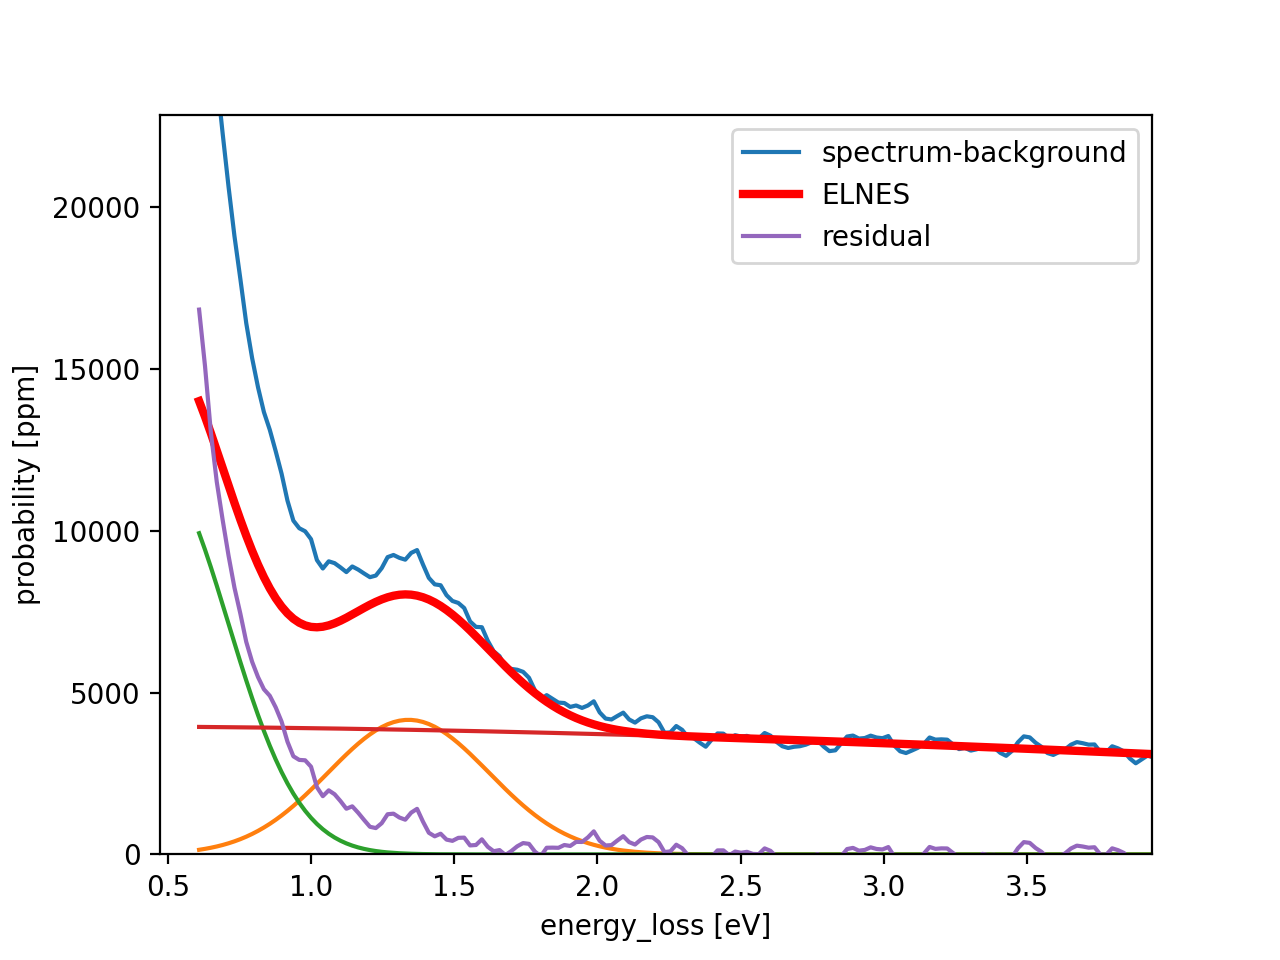

Difference has a standard deviation of 2708.621


In [131]:
from ipywidgets import IntProgress
from IPython.display import display
from scipy.optimize import leastsq

x_pos = 20
y_pos = 21

start_fit = np.searchsorted(energy_scale,.6)
end_fit = np.searchsorted(energy_scale,4)

peak_fit_result = np.zeros([current_dataset.shape[0],current_dataset.shape[1], len(pin)])
f = IntProgress(min=0, max=current_dataset.shape[0]-1) # instantiate the bar
display(f) # display the bar
for x_pos in range(current_dataset.shape[0]):
    f.value = (x_pos)
    for y_pos in range(current_dataset.shape[1]):
        p = fit_peaks(current_dataset, x_pos, y_pos, pin, start_fit, end_fit)
        peak_fit_result[x_pos,y_pos,:] = p
        

print(f'peak \t position \t amplitude \t width')
for i in range(number_of_peaks):
    print(f'{i+1}   \t   {p[i*3]:.2f}    \t   {p[i*3+1]:.1f}   \t  {p[i*3+2]:.3f}')

spectrum = current_dataset[x_pos,y_pos,:]
energy_scale = current_dataset.dims[2][0]
fit_energy = energy_scale[start_fit:end_fit]
fit_spectrum = (spectrum)[start_fit:end_fit]    


plt.figure()

plt.xlabel('energy_loss [eV]')
plt.ylabel('probability [ppm]')

plt.plot(energy_scale, spectrum, label='spectrum-background')
edgeModel = model(fit_energy,p)
for i in range(number_of_peaks):
        y1 = gauss(fit_energy, p[i*3:])
        #edgeModel = edgeModel + y1
        plt.plot(fit_energy, y1)#, label= f'peak {p[i*3]:.1f}eV')  
plt.plot(fit_energy, edgeModel , linewidth = 3, c='r' , label = 'ELNES')  
plt.plot(fit_energy, fit_spectrum-edgeModel , label = 'residual')  
plt.xlim(-2,7)
plt.gca().set_ylim(0,np.max(spectrum-zero_loss)/2)
  
plt.legend();
print(f'Difference has a standard deviation of {np.std(fit_spectrum-edgeModel):.3f}')

IntProgress(value=0, max=29)

<IPython.core.display.Javascript object>


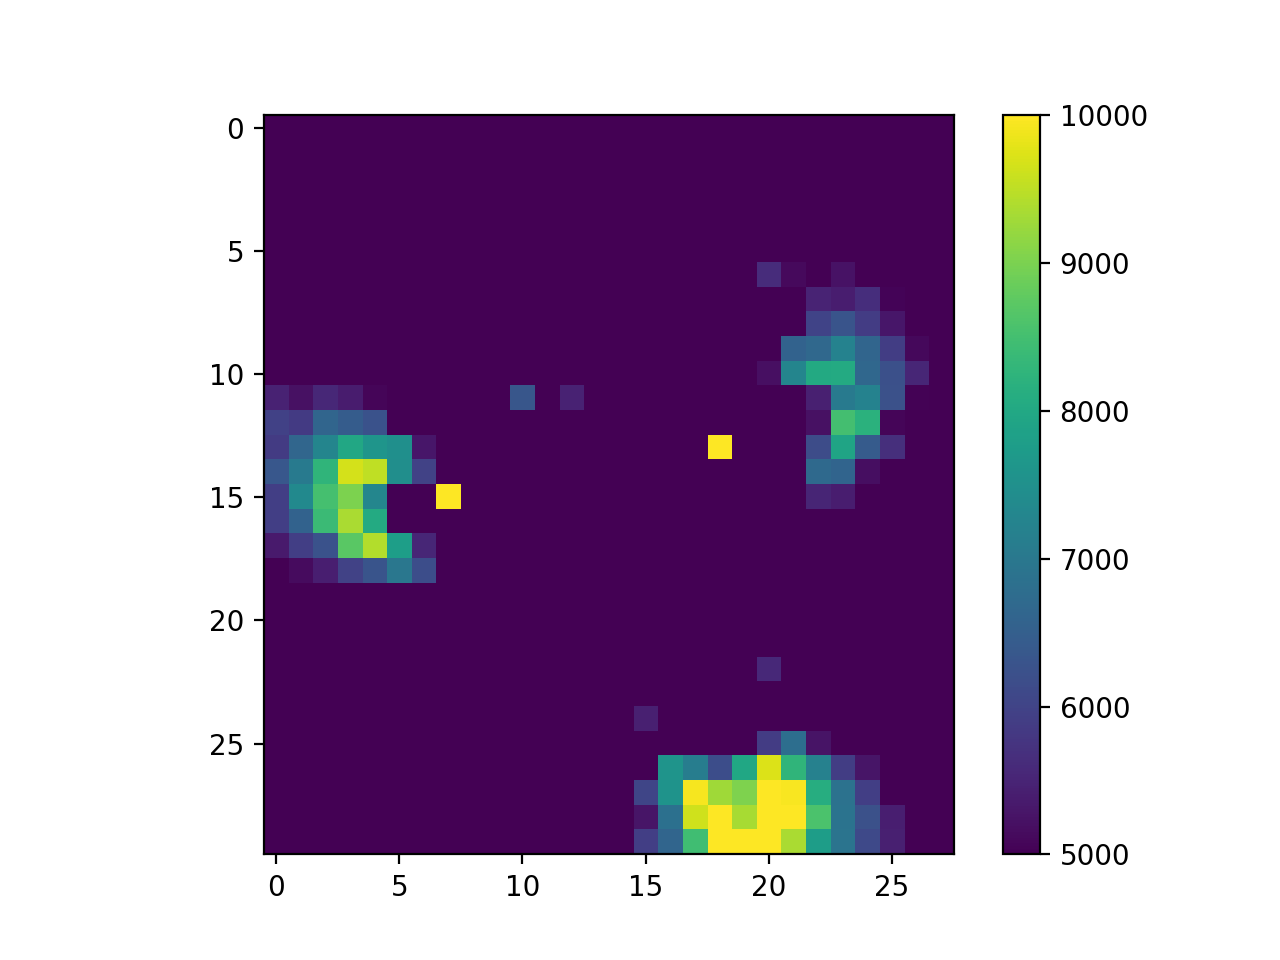

In [170]:
peak_fit_result2 = np.abs(peak_fit_result)
f = IntProgress(min=0, max=current_dataset.shape[0]-1) # instantiate the bar
display(f) # display the bar
for x_pos in range(current_dataset.shape[0]):
    f.value = (x_pos)
    for y_pos in range(current_dataset.shape[1]):
        if abs(peak_fit_result2[x_pos,y_pos,0] - 1.4)>.2:
            peak_fit_result2[x_pos,y_pos,1] = 0
        if abs(peak_fit_result2[x_pos,y_pos,6] - 2.7)>.4:
            peak_fit_result2[x_pos,y_pos,7] = 0
plt.figure()
plt.imshow(peak_fit_result2[:,:,1], vmin = 5e3, vmax = 1e4)
plt.colorbar()

peak 	 position 	 amplitude 	 width
1   	   1.30    	   1401.6   	  0.569
2   	   0.19    	   20817.1   	  0.845
3   	   2.72    	   7799.3   	  2.990


<IPython.core.display.Javascript object>


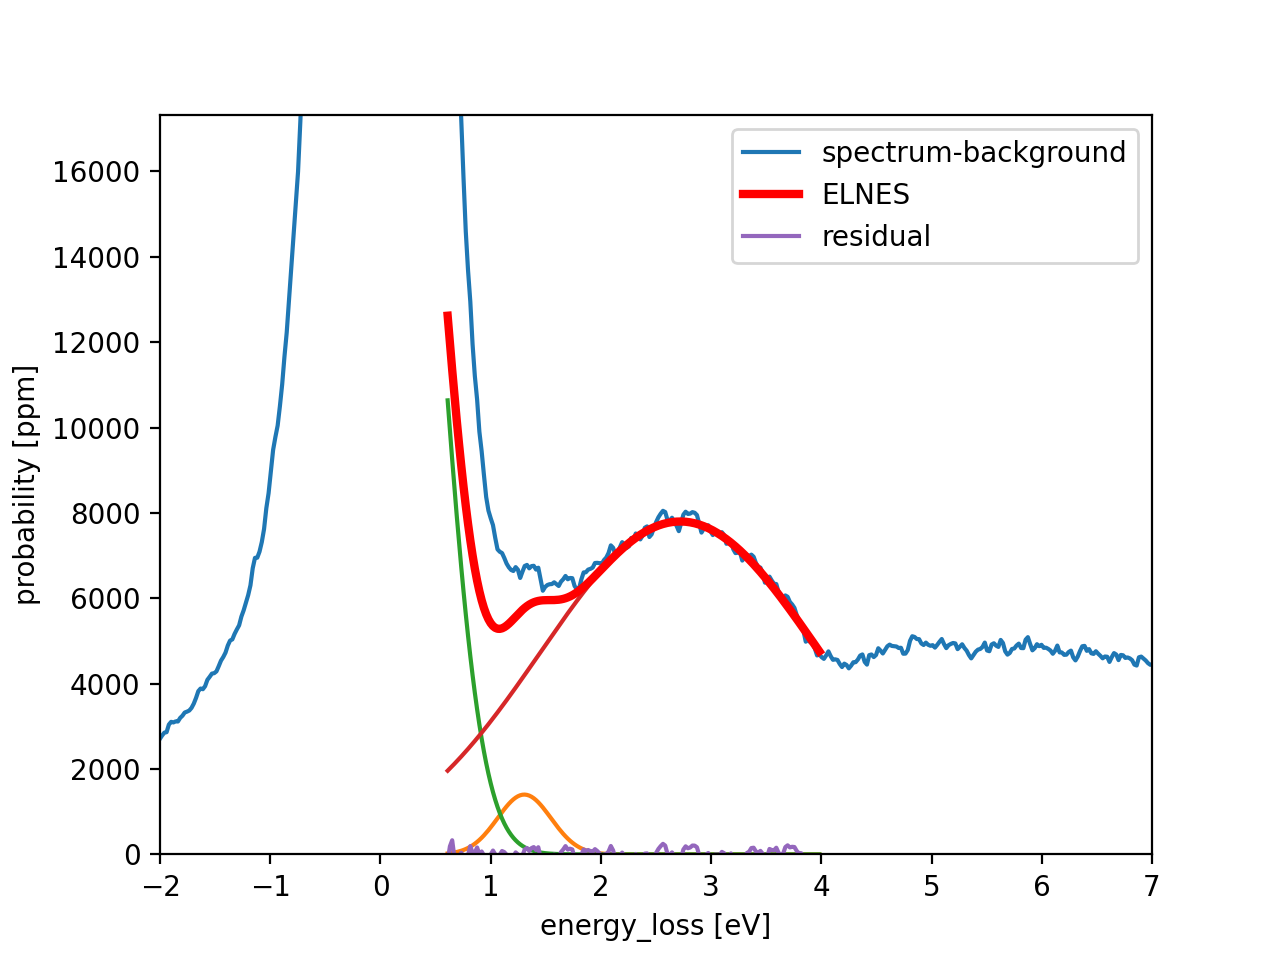

Difference has a standard deviation of 124.145


In [133]:
from scipy.optimize import leastsq

x_pos = 20
y_pos = 21


#pin.append(1)
#pin.append(spectrum[np.searchsorted(energy_scale,1.)])
#pin.append(1)
#pin_original = pin
number_of_peaks = int(len(pin)/3)

current_dataset = si_group['nDim_Data']
spectrum = np.average(current_dataset[x_pos-1:x_pos+1,y_pos-1:y_pos+1,:], axis=(0,1))
energy_scale = current_dataset.dims[2][0]
zero_loss, pZL = eels.resolution_function(energy_scale, spectrum, zero_loss_fit_width)



fit_energy = energy_scale[start_fit:end_fit]
fit_spectrum = (spectrum-zero_loss)[start_fit:end_fit]


p, cov = leastsq(residuals, pin,  args = (fit_energy,fit_spectrum) )

print(f'peak \t position \t amplitude \t width')
for i in range(number_of_peaks):
    print(f'{i+1}   \t   {p[i*3]:.2f}    \t   {p[i*3+1]:.1f}   \t  {p[i*3+2]:.3f}')

    
plt.figure()

plt.xlabel('energy_loss [eV]')
plt.ylabel('probability [ppm]')

plt.plot(energy_scale, spectrum, label='spectrum-background')
edgeModel = model(fit_energy,p)
for i in range(number_of_peaks):
        y1 = gauss(fit_energy, p[i*3:])
        #edgeModel = edgeModel + y1
        plt.plot(fit_energy, y1)#, label= f'peak {p[i*3]:.1f}eV')  
plt.plot(fit_energy, edgeModel , linewidth = 3, c='r' , label = 'ELNES')  
plt.plot(fit_energy, fit_spectrum-edgeModel , label = 'residual')  
plt.xlim(-2,7)
plt.gca().set_ylim(0,np.max(spectrum-zero_loss)/2)
  
plt.legend();
print(f'Difference has a standard deviation of {np.std(fit_spectrum-edgeModel):.3f}')

<IPython.core.display.Javascript object>


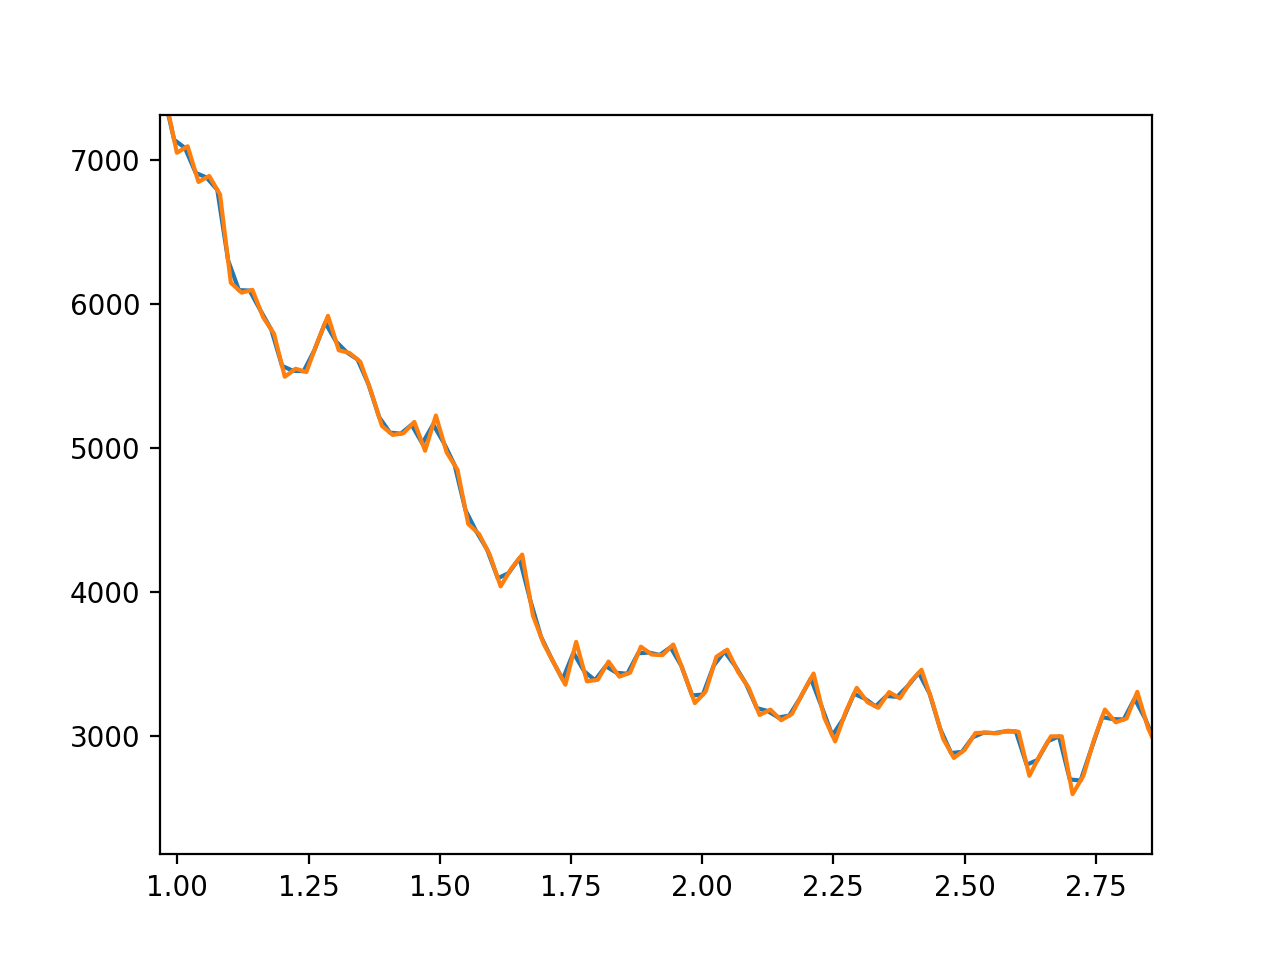

In [160]:
import importlib
importlib.reload(eels)

def get_energy_shifts(spectrum_image, energy_scale, zero_loss_fit_width):
    shifts= np.zeros(spectrum_image.shape[0:2])
    for x in range(spectrum_image.shape[0]):
        for y in range(spectrum_image.shape[1]):
            spectrum = spectrum_image[x,y,:]
            FWHM,deltaE = eels.fixE( spectrum, energy_scale)
            zLoss, pZL = eels.resolution_function(energy_scale-deltaE, spectrum, zero_loss_fit_width)
            FWHM2,deltaE2 = eels.fixE( zLoss, energy_scale-deltaE)
            shifts[x,y] = deltaE+deltaE2
    return shifts
            
def shift_on_same_scale(spectrum_image, shift, energy_scale, master_energy_scale):
    new_SI = np.zeros(spectrum_image.shape)
    for x in range(spectrum_image.shape[0]):
        for y in range(spectrum_image.shape[1]):
            tck = interpolate.splrep(energy_scale-shift[x,y], spectrum_image[x,y,:], k = 1, s=0)
            new_SI[x,y,:] = interpolate.splev(master_energy_scale, tck, der=0)
    return new_SI

spectrum_image = eels.SI_plot.tags['cube'][:2,:2,:]
energy_scale = eels.SI_plot.energy_scale

energy_shifts = get_energy_shifts(spectrum_image, energy_scale, 0.35)
dispersion = energy_scale[1]-energy_scale[0]

if ss.min()> 0:
    shift = ss.max()
else:
    shift = ss.min()
master_energy_scale = np.arange(2048)*dispersion+energy_scale[0]-shift
shifted_SI = eels.shift_on_same_scale(spectrum_image,ss, energy_scale, master_energy_scale)

plt.figure()
plt.plot(master_energy_scale, shifted_SI[1,1,:])#.sum(axis=0).sum(axis=0)/shifted_SI.shape[0]/shifted_SI.shape[1])
plt.plot(energy_scale-ss[1,1], spectrum_image[1,1,:])


In [116]:
print(ss.min()), print(ss.max())

print(ss.min()/dispersion), print(ss.max()/dispersion)
dispersion = SI_plot.energy_scale[1]-SI_plot.energy_scale[0]
master_energy_scale = (np.arange(2048)energy_scale[0]-ss.min())*dispersion



print(energy_scale[0], energy_scale[-1])
print(energy_scale[0]/dispersion, energy_scale[-1]/dispersion)


2.023739427223738
2.631512734354303
98.41492815794967
127.97108818178715
-3.0568580391762907 39.03629474836009
-148.65573120117188 1898.3442687988281


3.0710166704894846
-0.17040003923100855
3.241416709720493 0.00018043647094400346


<IPython.core.display.Javascript object>


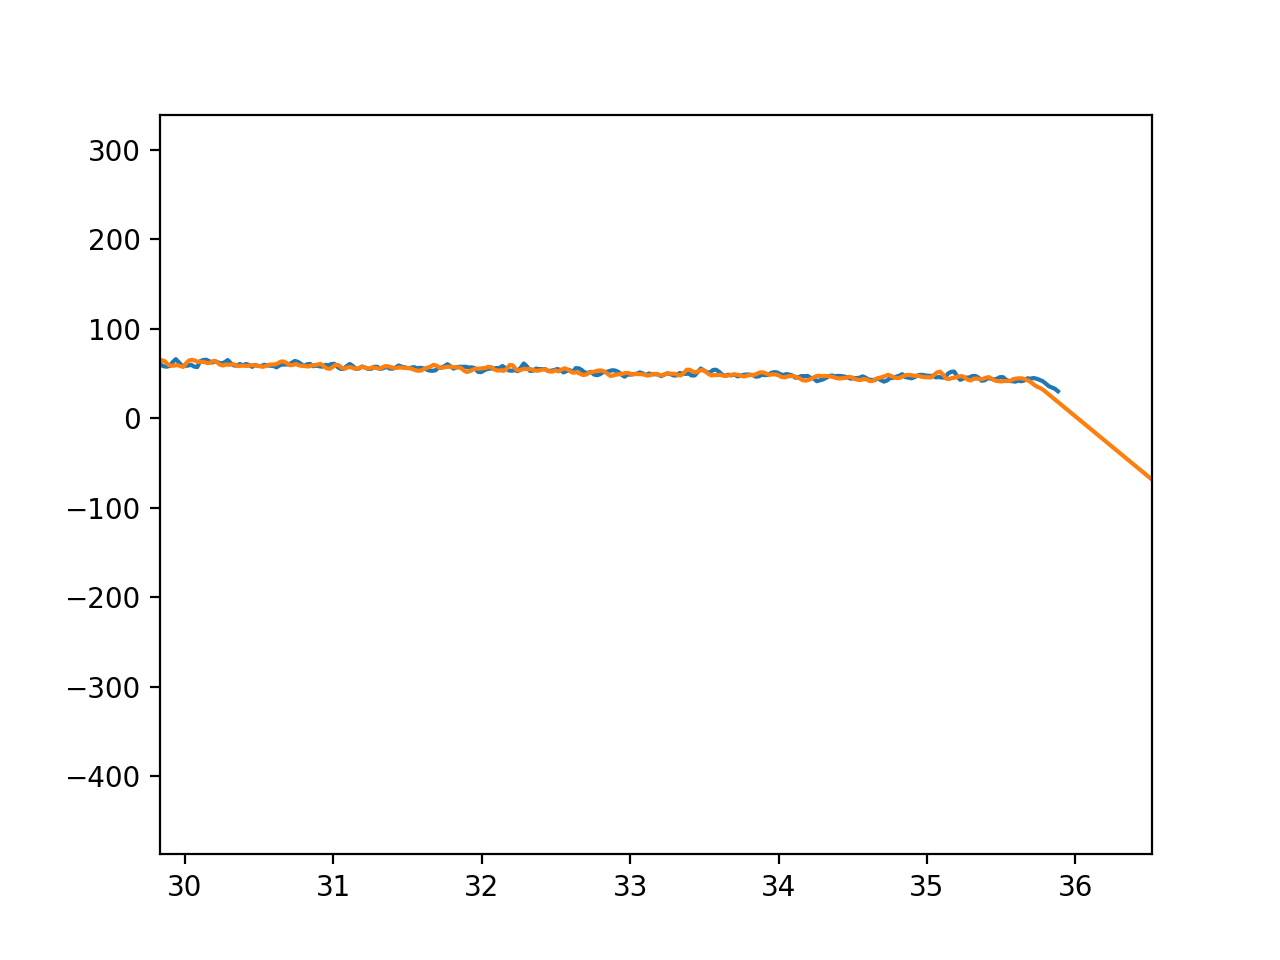

In [102]:
energy_scale, spectrum = SI_plot.energy_scale,SI_plot.spectrum
master_energy_scale = SI_plot.common_energy_scale
new_spectrum = shift_on_same_scale(spectrum,energy_scale, master_energy_scale )

#spectrum = SI_plot.get_spectrum()
plt.figure()
plt.plot(energy_scale-3.154, spectrum )
plt.plot(master_energy_scale, new_spectrum )


dict_keys(['aberrations', 'acceleration_voltage', 'camera_length', 'collection_angle', 'convergence_angle', 'exposure_spectrum', 'image_type', 'integration_time', 'machine_id', 'number_of_frames', 'platform', 'pyUSID_version', 'time_last_modified', 'timestamp', 'title', 'data_type', 'cube', 'data', 'spatial_size_x', 'spatial_size_y', 'spatial_scale_x', 'spatial_scale_y', 'FOV_x', 'FOV_y', 'extent', 'spatial_units', 'spectral_scale_x', 'spectral_units_x', 'spectral_origin_x', 'spectral_size_x', 'energy_scale', 'image', 'ylabel', 'spectra', 'zero_loss_fit_width'])
-0.17799072591049026
-0.17796416801593404
0.19284738117395883 -2.6557894556222497e-05


<IPython.core.display.Javascript object>


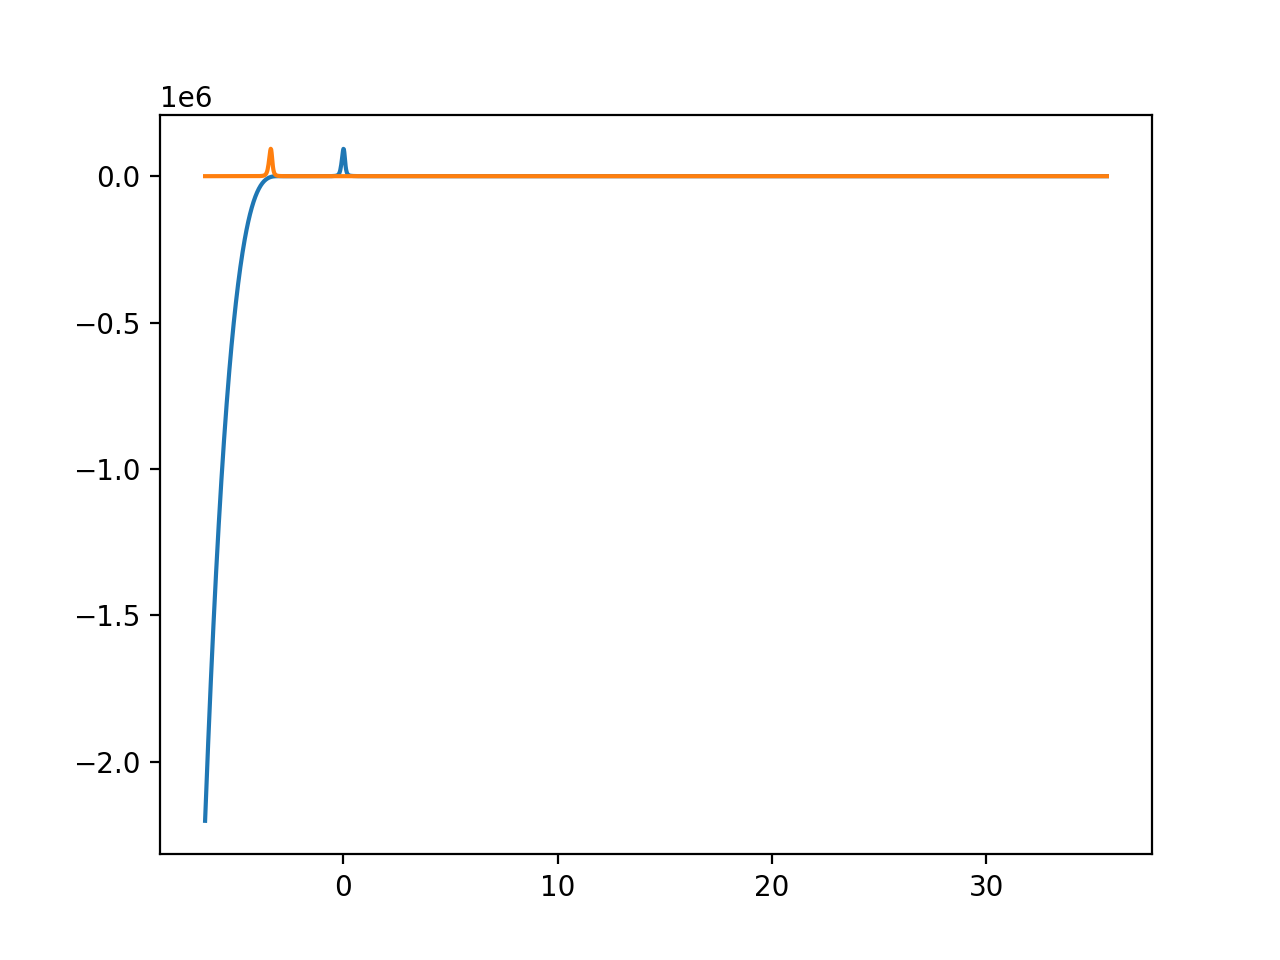

In [70]:
import EELS_tools  as eels 
from scipy import interpolate
import importlib
importlib.reload(eels)

    
print(SI_plot.tags.keys())

energy_scale = SI_plot.energy_scale
spectrum = SI_plot.spectrum

FWHM,deltaE = eels.fixE( spectrum, energy_scale)
zero_loss_fit_width = 0.25
zLoss, pZL = eels.resolution_function(energy_scale-deltaE, spectrum, zero_loss_fit_width)
FWHM2,deltaE2 = eels.fixE( zLoss, energy_scale-deltaE)

tck = interpolate.splrep(energy_scale-deltaE-deltaE2, spectrum, s=0)
spectrum_new = interpolate.splev(master_energy_scale, tck, der=0)
spectrum=spectrum_new
energy_scale= master_energy_scale
print(FWHM, deltaE)
#self.tags['spectra'][f'{self.x}-{self.y}']['deltaE'] = deltaE
#self.tags['spectra'][f'{self.x}-{self.y}']['FWHM'] = FWHM
plt.figure()
plt.plot(master_energy_scale,spectrum_new);
plt.plot(master_energy_scale,zLoss);

### Add survey image to file
If you have not done so before, add the survey image to the dataset (measurement group).

In [3]:
SI_channel = ft.h5add_channels(h5_file,current_channel,'survey image')
    
measurement_group = h5_file[current_channel.name.split('/')[1]]
    
for key in list(measurement_group.keys()):
    if 'title' in measurement_group[key].keys(): 
        print(key,': ',measurement_group[key]['title'][()])
    else:
        print(key,': ')   
        

Channel_000 :  13-EELS Spectrum Image (dark ref corrected)
Channel_001 :  survey image


### Add Z-contrast image
If you have not done so before, add the survey image to the dataset (measurement group).

In [4]:
Z_channel = ft.h5_add_channel(h5_file,current_channel,'Z-contrast image')

measurement_group = h5_file[current_channel.name.split('/')[1]]
    
for key in list(measurement_group.keys()):
    if 'title' in measurement_group[key].keys(): 
        print(key,': ',measurement_group[key]['title'][()])
    else:
        print(key,': ') 

Channel_000 :  13-EELS Spectrum Image (dark ref corrected)
Channel_001 :  survey image
Channel_002 :  Z-contrast image


### Add Survey Image to plot above

In [3]:
SI_plot.set_Survey_image(h5_file['Measurement_000']['Channel_001'])
SI_plot.overlay_data() 

### Overlay Z-contrast image on survey image at plot above

In [5]:
SI_plot.set_Survey_image(h5_file['Measurement_000']['Channel_001'])
SI_plot.overlay_Zcontrast_image(h5_file['Measurement_000']['Channel_002'])


In [9]:
SI_plot.set_Zcontrast_image(h5_file['Measurement_000']['Channel_002'])


<IPython.core.display.Javascript object>


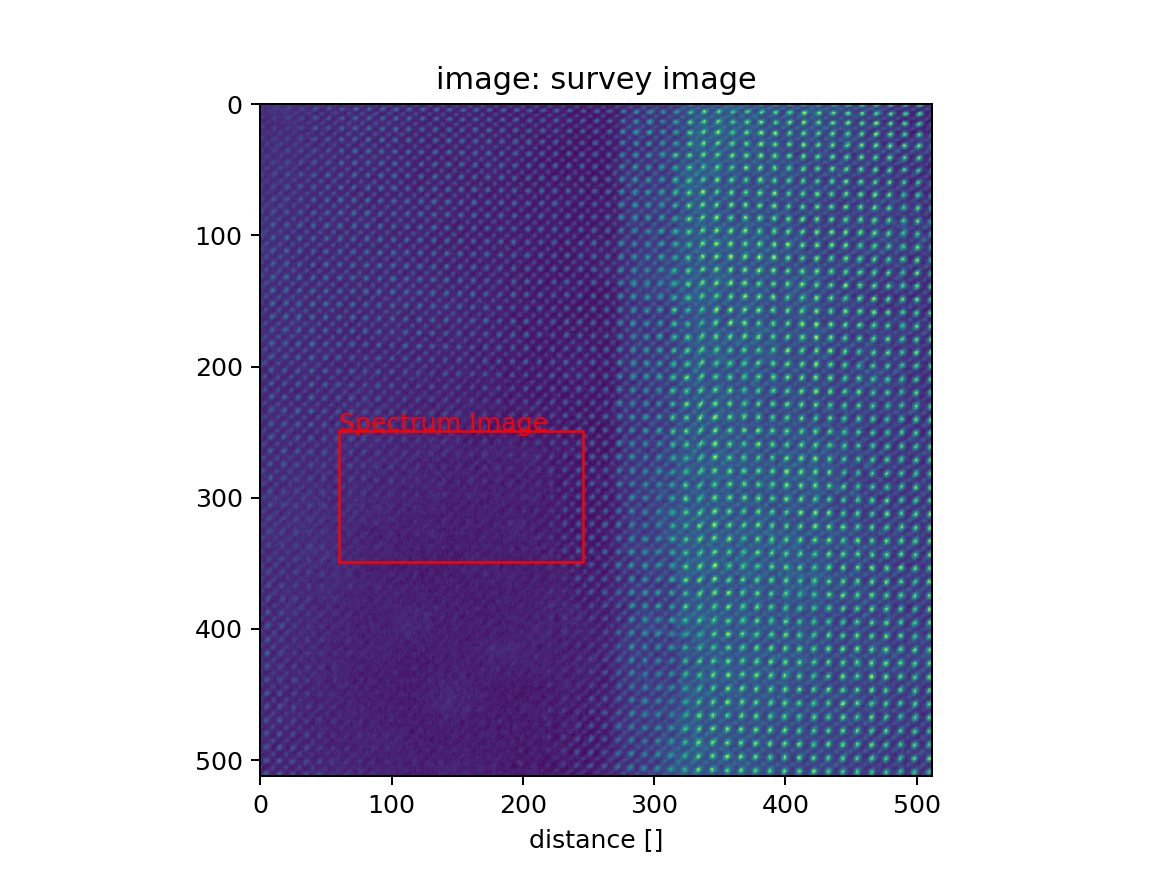

In [287]:
ft.h5_plot(h5_file['Measurement_000']['Channel_001'])

In [ ]:
#energy_scale = np.linspace(0,1023,1024)* 0.454 + tags['spectral_origin_x']-7

print(tags.keys())

In [11]:
from ipywidgets import widgets
class interactive_spectrum_image(object):
    """    
    ### Interactive spectrum imaging plot
    
    Input tags: dictionary with a minumum of the following keys:
        ['image']: displayed image  
        ['data']:  data cube
        [if ]'intentsity_scale_ppm']: intensity scale         
        ['ylabel']: intensity label
        ['spectra'] dictionary which contains dictionaries for each spectrum style ['1-2']:
            ['spectrum'] = tags['cube'][y,x,:]
            ['spectra'][f'{x}-{y}']['energy_scale'] = tags['energy_scale']
            ['intensity_scale'] = 1/tags['cube'][y,x,:].sum()*1e6
    
    Please note the possibility to load any image for the selection of the spectrum
    Also there is the possibilty to display the survey image.
    
    For analysis we have the following options:
        'fix_energy': set zero-loss peak maximum to zero !! Low loss spectra only!!
        'fit_zero_loss': fit zero-loss peak with model function !! Low loss spectra only!!
        'fit_low_loss': fit low-loss spectrum with model peaks !! Low loss spectra only!!
        
        
        'fit_composition': fit core-loss spectrum with background and cross sections!! Core loss spectra only!!
        'fit_ELNES': fit core-loss edge with model peaks  !! Core loss spectra only!!
    """
    
    def __init__(self, data_source, horizontal = True):
        
        box_layout = widgets.Layout(display='flex',
                    flex_flow='row',
                    align_items='stretch',
                    width='80%')

        words = ['fix_energy','fit_zero_loss','fit_low_loss','fit_composition','fit_ELNES']
        
        self.buttons = [widgets.ToggleButton(value=False, description=word, disabled=False) for word in words]
        box = widgets.Box(children=self.buttons, layout=box_layout)
        display(box)
        
        

        self.sum_x = widgets.Checkbox(False, description='sum x')
        
        self.sum_y = widgets.Checkbox(False, description='sum y')
        self.bin_x = widgets.Dropdown(options=['1', '2', '3', '4', '8'],value='1', description='bin x:', disabled=False)
        self.bin_y = widgets.Dropdown(options=['1', '2', '3', '4', '8'],value='1', description='bin y:', disabled=False)
        
        box = widgets.Box(children=[self.sum_x,self.sum_y,self.bin_x,self.bin_y], layout=box_layout)
        display(box)

        self.sum_x.observe(self.spectrum_select, 'value')
        self.sum_y.observe(self.spectrum_select, 'value')
        self.bin_x.observe(self.spectrum_select, 'value')
        self.bin_y.observe(self.spectrum_select, 'value')

        ## MAKE Dictionary
        
        if isinstance(data_source,dict):
            self.tags = data_source
        elif isinstance(data_source, h5py.Group):  
            self.tags = self.set_tags(data_source)
        else: 
            print('Data source must be a dictionary or channel')
            return

        #Button(description='edge_quantification')
        for button in self.buttons:
            button.observe(self.onButtonClicked, 'value')#on_click(self.onButtonClicked)
        
        
        self.figure = plt.figure()
        self.horizontal = horizontal
        self.x = 0
        self.y = 0
        
        self.extent = [0,self.tags['cube'].shape[1],self.tags['cube'].shape[0],0]
        self.rectangle = [0,self.tags['cube'].shape[1],0, self.tags['cube'].shape[0]]
        self.scaleX = 1.0
        self.scaleY = 1.0
        
        self.analysis = []fit_l
        self.plot_legend = False
        if 'ylabel' not in self.tags:
            tags['ylabel'] = 'intensity [a.u.]'
        self.SI = False
        
        if horizontal:
            self.ax1=plt.subplot(1, 2, 1)
            self.ax2=plt.subplot(1, 2, 2)
        else:
            self.ax1=plt.subplot(2, 1, 1)
            self.ax2=plt.subplot(2, 1, 2)
            
        self.cube = self.tags['cube']
        self.image = self.tags['cube'].sum(axis=2)
        
        self.ax1.imshow(self.image, extent = self.extent)
        if horizontal:
            self.ax1.set_xlabel('distance [pixels]')
        else:
            self.ax1.set_ylabel('distance [pixels]')
        self.ax1.set_aspect('equal')
        
        self.rect = patches.Rectangle((0,0),1,1,linewidth=1,edgecolor='r',facecolor='red', alpha = 0.2)
        self.ax1.add_patch(self.rect)
        self.intensity_scale = self.tags['spectra'][f'{self.x}-{self.y}']['intensity_scale']
        self.spectrum = self.tags['spectra'][f'{self.x}-{self.y}']['spectrum']* self.intensity_scale
        self.energy_scale = self.tags['spectra'][f'{self.x}-{self.y}']['energy_scale']
        
        self.ax2.plot(self.energy_scale,self.spectrum)
        self.ax2.set_title(f' spectrum {self.x},{self.y} ')
        self.ax2.set_xlabel('energy loss [eV]')
        self.ax2.set_ylabel(self.tags['ylabel'])
        self.cid = self.figure.canvas.mpl_connect('button_press_event', self.onclick)
        
        plt.tight_layout()
    def spectrum_select(self,b):
        #selection = b['owner'].description
        self.update() 
    def onButtonClicked2(self,b):
        selection = b['owner'].description
        self.update()        
        
    def onButtonClicked(self,b):
        #print(b['owner'].description)
        selection = b['owner'].description
        if b['new']:
            if selection == 'fit_composition':
                if 'region_tags' in self.tags and 'edges_present' in self.tags and 'acceleration_voltage' in self.tags and 'collection_angle' in self.tags:
                    pass
                else:
                    self.buttons[3].value = False
                    return
            elif selection in  ['fix_energy', 'fit_zero_loss']:
                if self.energy_scale[0] > 0:
                    button_index = ['fix_energy', 'fit_zero_loss'].index(selection)
                    self.buttons[button_index].value = False
                    return
            self.analysis.append(selection)
            self.update()
        else:
               
            if selection in self.analysis:
                self.analysis.remove(selection)
        self.update()
                
    def do_All(self, selection= None, verbose = True):
        x = self.x
        y = self.y 
        if selection==None:
            selection = self.analysis
        for self.x in range(self.cube.shape[1]):
            if verbose:
                #print(f' row: {self.x}')
                if done < int(self.x/self.cube.shape[1]*50):
                    done = int(self.x/nimages*50)
                    sys.stdout.write('\r')
                    # progress output :
                    sys.stdout.write("[%-50s] %d%%" % ('='*done, 2*done))
                    sys.stdout.flush()
            for self.y in range(self.cube.shape[0]):
                
                if 'fit_zero_loss' in selection:
                    title = self.fit_zero_loss(plot_this = False)
                    
                elif 'fix_energy' in selection:
                    self.ax2.set_title('bn')
                    title = self.fix_energy()
                    
                elif 'fit_composition' in selection:
                    title = self.fit_quantification(plot_this = False)
                    
        self.x = x
        self.y = y          
        
    def onclick(self,event):
        x = int(event.xdata)
        y = int(event.ydata)
        
        #print(x,y)
        if x >= self.rectangle[0] and x < self.rectangle[0]+self.rectangle[1]:
            if y >= self.rectangle[2] and y < self.rectangle[2]+self.rectangle[3]:
                self.x = int((x - self.rectangle[0])/ self.rectangle[1]*self.cube.shape[1])
                self.y = int((y - self.rectangle[2])/ self.rectangle[3]*self.cube.shape[0])
            else:
                return
        else:
            return
        
        if self.x + int(self.bin_x.value) > self.cube.shape[1]:
            self.x = self.cube.shape[1] - int(self.bin_x.value)
        if self.y + int(self.bin_y.value) > self.cube.shape[0]:
            self.y = self.cube.shape[0] - int(self.bin_y.value)
        if event.inaxes in [self.ax1]:
            
            self.update()
            
    def get_spectrum(self):
        self.intensity_scale = self.tags['spectra'][f'{self.x}-{self.y}']['intensity_scale']
        self.energy_scale = self.tags['spectra'][f'{self.x}-{self.y}']['energy_scale']
        if self.sum_x.value:
            biny = int(self.bin_y.value)
            endy = biny +self.y
            spectrum = (self.cube[self.y:endy,:,:].sum(axis=0)).sum(axis=0)/self.cube.shape[1]/biny* self.intensity_scale
            
            if 'line_y' not in self.tags:
                self.tags['line_y'] = {}
            self.tags['line_y'][f'{self.y}'] ={}
            self.tags['line_y'][f'{self.y}']['spectrum'] =spectrum
            self.tags['line_y'][f'{self.y}']['energy_scale '] =spectrum
            self.tags['line_y'][f'{self.y}']['intensity_scale'] =spectrum
            
        elif self.sum_y.value:
            binx = int(self.bin_x.value)
            endx = binx +self.x
            #spectrum = self.cube[:,self.x,:].sum(axis=0)/self.cube.shape[0]* self.intensity_scale
            spectrum = (self.cube[:,self.x:endx,:].sum(axis=1)).sum(axis=0)/self.cube.shape[1]/binx* self.intensity_scale
            
            if 'line_x' not in self.tags:
                self.tags['line_x'] = {}
            self.tags['line_x'][f'{self.x}'] ={}
            self.tags['line_x'][f'{self.x}']['spectrum'] =spectrum
            self.tags['line_x'][f'{self.x}']['energy_scale '] =spectrum
            self.tags['line_x'][f'{self.x}']['intensity_scale'] =spectrum
        else:
            binx = int(self.bin_x.value)
            endx = binx +self.x
            biny = int(self.bin_y.value)
            endy = biny +self.y
            spectrum = (self.cube[self.y:endy,self.x:endx,:].sum(axis=0)).sum(axis=0)/binx/biny* self.intensity_scale
            
        return   spectrum
    def update(self):
        xlim = self.ax2.get_xlim()
        ylim = self.ax2.get_ylim()
        
        x = (self.x * self.rectangle[1]/self.cube.shape[1]+ self.rectangle[0])
        y = (self.y * self.rectangle[3]/self.cube.shape[0]+ self.rectangle[2])

        if self.sum_x.value:
            self.rect.set_xy([0,y]) 
            self.rect.set_width(self.cube.shape[1])
            self.rect.set_height(int(self.bin_y.value))
        elif self.sum_y.value:
            self.rect.set_xy([x,0]) 
            self.rect.set_width(int(self.bin_y.value))
            self.rect.set_height(self.cube.shape[0])
        else:
            self.rect.set_width(int(self.bin_y.value))
            self.rect.set_height(int(self.bin_x.value))
            self.rect.set_xy([x,y]) 
                
                
        self.ax2.clear()
        
        self.spectrum = self.get_spectrum()
        
        if 'fit_zero_loss' in self.analysis:
            title = self.fit_zero_loss()
            self.ax2.set_title(title)
        elif 'fix_energy' in self.analysis:
            self.ax2.set_title('bn')
            title = self.fix_energy()
            self.ax2.set_title(title)

        elif 'fit_composition' in self.analysis:
            title = self.fit_quantification()
            self.ax2.set_title(title)

        else:
            if self.sum_x.value:
                if int(self.bin_y.value) == 1:
                    self.ax2.set_title(f' line: {self.y}')
                else: 
                    self.ax2.set_title(f' line: {self.y} - {self.y+ int(self.bin_y.value)}')
            elif self.sum_y.value:
                if int(self.bin_y.value) == 1:
                    self.ax2.set_title(f' column: {self.x}')
                else: 
                    self.ax2.set_title(f' column: {self.x} - {self.x+ int(self.bin_x.value)}')
                
            else:
                
                if int(self.bin_y.value)* int(self.bin_y.value) >1:
                    self.ax2.set_title(f' spectrum {self.x} - {self.x+ int(self.bin_x.value)}, {self.y} - {self.y+ int(self.bin_y.value)}')
                else:
                    self.ax2.set_title(f' spectrum {self.x},{self.y}')
        self.ax2.plot(self.energy_scale,self.spectrum, color= '#1f77b4', label = 'experiment')
            
        if self.plot_legend:
            self.ax2.legend(shadow=True);
        self.ax2.set_xlim(xlim)
        self.ax2.set_ylim(ylim)
        self.ax2.set_xlabel('energy loss [eV]')
        self.ax2.set_ylabel(self.tags['ylabel'])
        self.ax2.set_xlim(xlim)
        
        #self.ax2.draw()
    def set_tags(self, channel):
        tags = ft.h5_get_dictionary(channel)
        if tags['data_type']== 'spectrum_image':
            tags['image'] = tags['data']
            tags['data'] = tags['cube'][0,0,:]
            if 'intentsity_scale_ppm' not  in channel:
                channel['intentsity_scale_ppm'] = 1
                
            tags['ylabel'] = 'intensity [a.u.]'
            tags['spectra'] = {}
            tags['line_x'] = {}
            tags['line_y'] = {}
            for x in range(tags['spatial_size_y']):
                for y in range(tags['spatial_size_x']):
                    tags['spectra'][f'{x}-{y}'] ={}
                    tags['spectra'][f'{x}-{y}']['spectrum'] = tags['cube'][y,x,:]
                    tags['spectra'][f'{x}-{y}']['energy_scale'] = tags['energy_scale']
                    tags['spectra'][f'{x}-{y}']['intensity_scale'] = 1/tags['cube'][y,x,:].sum()*1e6
            tags['ylabel'] = 'inel. scat. int.  [ppm]'

        return tags
    def fix_energy(self):
        
        energy_scale = self.tags['spectra'][f'{self.x}-{self.y}']['energy_scale']
        spectrum = self.tags['spectra'][f'{self.x}-{self.y}']['spectrum'] * self.intensity_scale
        FWHM,deltaE = fixE( spectrum, energy_scale)
        self.tags['spectra'][f'{self.x}-{self.y}']['deltaE'] = deltaE
        self.tags['spectra'][f'{self.x}-{self.y}']['FWHM'] = FWHM
        self.energy_scale = energy_scale-deltaE
        title =f'spectrum {self.x},{self.y} FWHM: {FWHM:.2f}, dE: {deltaE:.3f}'
        return title
        
    def fit_zero_loss(self, plot_this = True):
        
        energy_scale = self.tags['spectra'][f'{self.x}-{self.y}']['energy_scale']
        spectrum = self.tags['spectra'][f'{self.x}-{self.y}']['spectrum'] * self.intensity_scale
        if 'zero_loss_fit_width' not in self.tags:
            self.tags['zero_loss_fit_width'] = .5
        if self.tags['zero_loss_fit_width']/(energy_scale[1]-energy_scale[0]) < 6:
            self.tags['zero_loss_fit_width']= (energy_scale[1]-energy_scale[0]) *6
        FWHM,deltaE = fixE( spectrum, energy_scale)
        energy_scale = energy_scale -deltaE
        zLoss, pZL = resolution_function(energy_scale, spectrum, self.tags['zero_loss_fit_width'])
        FWHM2,deltaE2 = fixE( zLoss, energy_scale)
        
        self.tags['spectra'][f'{self.x}-{self.y}']['resolution_function'] = zLoss
        self.tags['spectra'][f'{self.x}-{self.y}']['pZL'] = pZL
        self.tags['spectra'][f'{self.x}-{self.y}']['deltaE'] = deltaE
        self.tags['spectra'][f'{self.x}-{self.y}']['FWHM_resolution'] = FWHM2
        self.tags['spectra'][f'{self.x}-{self.y}']['FWHM'] = FWHM
        
        if plot_this:
            self.ax2.plot(energy_scale,zLoss, label = 'resolution function', color = 'black')
            self.ax2.plot(energy_scale,self.spectrum-zLoss, label = 'difference', color = 'orange')
            self.ax2.axhline(linewidth = 0.5, color= 'black');
        self.energy_scale = energy_scale
        title =f'spectrum {self.x},{self.y} FWHM: {FWHM:.2f}'#', dE: {deltaE2:.5e}'
        return title

    def fit_quantification(self, plot_this = True):
        self.spectrum =  self.get_spectrum()
        
        edges = eels.make_edges(self.tags['edges_present'], self.energy_scale, self.tags['acceleration_voltage'], self.tags['collection_angle'])
        edges = eels.fit_edges(self.spectrum, self.energy_scale, self.tags['region_tags'], edges)
        if self.sum_x.value:
            #self.tags['line_y'][f'{self.y}']['edges'] = edges.copy()
            pass
        elif self.sum_y.value:
            self.tags['line_x'][f'{self.x}']['edges'] = edges.copy()
        else:
            self.tags['spectra'][f'{self.x}-{self.y}']['edges'] = edges.copy()
        if plot_this:
            self.ax2.plot(self.energy_scale,edges['model']['spectrum'], label = 'model')
            self.ax2.plot(self.energy_scale,self.spectrum-edges['model']['spectrum'], label = 'difference')
            self.ax2.axhline(linewidth = 0.5, color= 'black');
        else:
            self.tags['spectra'][f'{self.x}-{self.y}']['do_All'] = 'done'
        title = f'spectrum {self.x},{self.y} '
        
        for key in edges:
            if key.isdigit():
                title = title +f"{edges[key]['element']}:  {edges[key]['areal_density']:.2e};  "
        
        return title
    
    def set_legend(self, setLegend):
        self.plot_legend = setLegend
    
    def get_xy(self):
        return [self.x,self.y]
    
    def get_current_spectrum(self):
        return self.cube[self.y,self.x,:]
    
   

In [285]:
print(int(SI_plot2.bin_x.value))

4


## Prepare Quantification

<IPython.core.display.Javascript object>


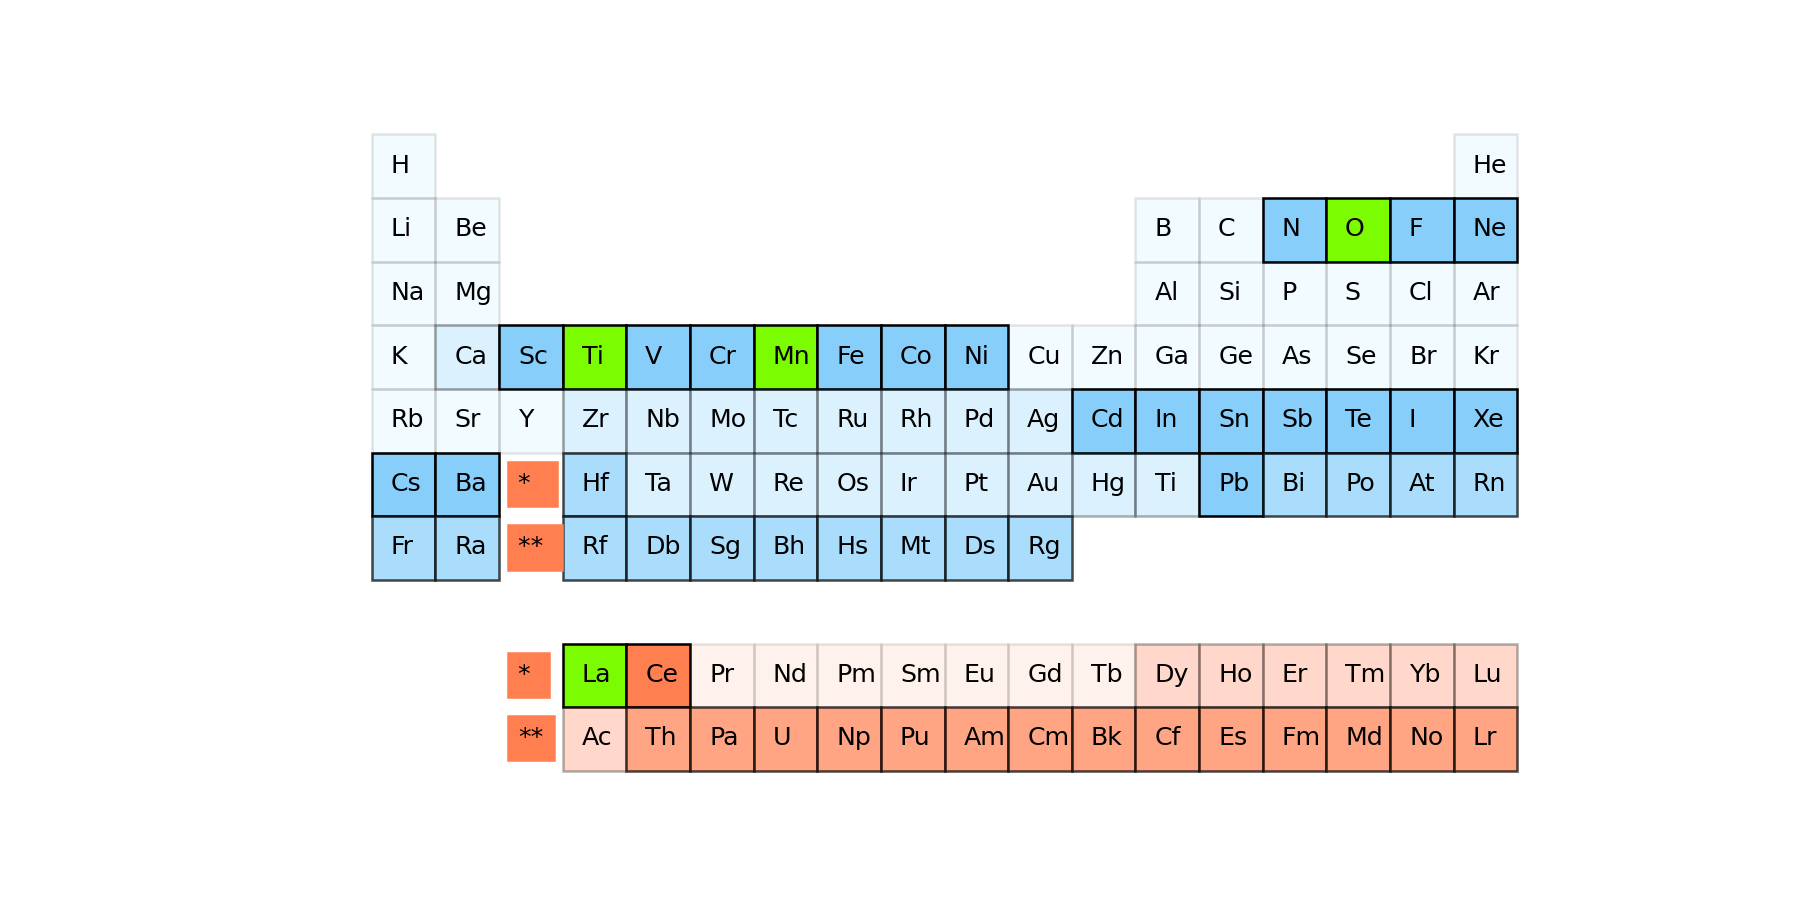

In [4]:
tags = ft.h5_get_dictionary(current_channel)

pt = eels.periodic_table( tags['energy_scale'])
pt.set_likely_edges()

In [9]:
edges_present = pt.get_edge_list()
print('edges_present: ',edges_present)

edges_present:  ['Ti-L3', 'O-K1', 'Mn-L3', 'La-M5']


In [10]:
## Edit edges_present List if necessary
#edges_present = ['Ti-L3', 'O-K1', 'Mn-L3', 'La-M5']

tags = SI_plot.tags.copy()
SI_plot2= interactive_spectrum_image(tags, horizontal = False)

# Set edges to be fitted
edges_present = ['Ti-L3', 'O-K1', 'Mn-L3', 'La-M5']
SI_plot2.tags['edges_present'] = edges_present

## ACTIVATE THE FITTING
#SI_plot.analysis= 'fit_quantification'
#SI_plot2.set_legend(False)    

NameError: name 'widgets' is not defined

### Activate the regions selection tool.

In [189]:
## define the fitting regions
edges = eels.make_edges(edges_present, tags['energy_scale'], tags['acceleration_voltage'], tags['collection_angle'])

regions = eels.Region_Selector(SI_plot2.ax2)
for key in edges:
    regions.set_regions(str(key),edges[key]['onset']-edges[key]['start_exclude'], edges[key]['start_exclude']+edges[key]['end_exclude'])                               
regions.set_regions('fit region',tags['energy_scale'][100], tags['energy_scale'][-1]-tags['energy_scale'][100])


### After adjusting the regions, remove the selector and make legend visible

In [190]:
SI_plot2.set_legend(True)
region_tags = regions.get_regions()
SI_plot2.tags['region_tags'] = region_tags
tags2 = SI_plot2.tags.copy()
try:
    regions.disconnect()
    del regions
except:
    pass

### You can  adjust the previous selections 

In [132]:
try:
    region_tags = regions.get_regions()
    regions.disconnect()
    del regions
except:
    pass

regions = eels.Region_Selector(SI_plot2.ax2)
print(region_tags['1'].keys())
for key in region_tags:
    regions.set_regions(str(key),region_tags[key]['start_x'], region_tags[key]['width_x'])                               


dict_keys(['start_x', 'width_x'])


The result of the selected spectrum can be seen here

In [135]:
x = SI_plot2.x
y = SI_plot2.y
print('spectrum ', x,y)
spectrum_dictionary = SI_plot2.tags['spectra'][f'{x}-{y}']['edges']
for key in  spectrum_dictionary: 
    if key.isdigit():  # only edges have numbers in that dictionary
        
        element = spectrum_dictionary [key]['element']
        areal_density =  spectrum_dictionary[key]['areal_density']
        print(f'{element:2}: {areal_density:.3e} counts')
        
        


spectrum  36 23
Ti: 2.322e+10 counts
O : 6.025e+10 counts
Mn: 5.072e+09 counts
La: 2.429e+09 counts


## Whole Spectrum Image Analysis

Now we do the all the spectra, with the same setting as selected above. 
Set the verbose variable to **True** to see the progress.

In [152]:
print (SI_plot2.cube.shape)
SI_plot2.cube = SI_plot2.tags['cube']
linescan = SI_plot2.tags['cube'].sum(axis=0)
print(linescan.shape)

(12, 141, 2048)
(141, 2048)


In [298]:
spectrum_dictionary = SI_plot2.tags['spectra']['0-0']
energy_scale = (spectrum_dictionary['energy_scale']-10)*1.025
spectrum = spectrum_dictionary['spectrum'] 
edges = eels.make_edges(SI_plot2.tags['edges_present'], energy_scale, SI_plot2.tags['acceleration_voltage'], SI_plot2.tags['collection_angle'])
regions = SI_plot2.tags['region_tags']
line_dict = {} 
results = {}
for key in  spectrum_dictionary['edges']: 
    if key.isdigit():  # only edges have numbers in that dictionary
        element = spectrum_dictionary ['edges'][key]['element']
        line_dict[element] = []
            
print(line_dict.keys())
for i in range(linescan.shape[0]):
    spectrum = linescan[i,:]
    
    fit = eels.fit_edges(spectrum, energy_scale, regions, edges)
    results[str(i)] = fit.copy()
    for key in  fit: 
        if key.isdigit():  # only edges have numbers in that dictionary
            element = fit[key]['element']
            areal_density =  fit[key]['areal_density']
            #print(f'{element:2}: {areal_density:.3e} counts')
            line_dict[element].append(areal_density)


dict_keys(['Ti', 'O', 'Mn', 'La'])


In [237]:
print(fit['model'].keys())


dict_keys(['background', 'background-poly_0', 'background-poly_1', 'background-poly_2', 'background-A', 'background-r', 'spectrum', 'blurred', 'mask', 'fit_parameter', 'fit_area_start', 'fit_area_end'])


<IPython.core.display.Javascript object>


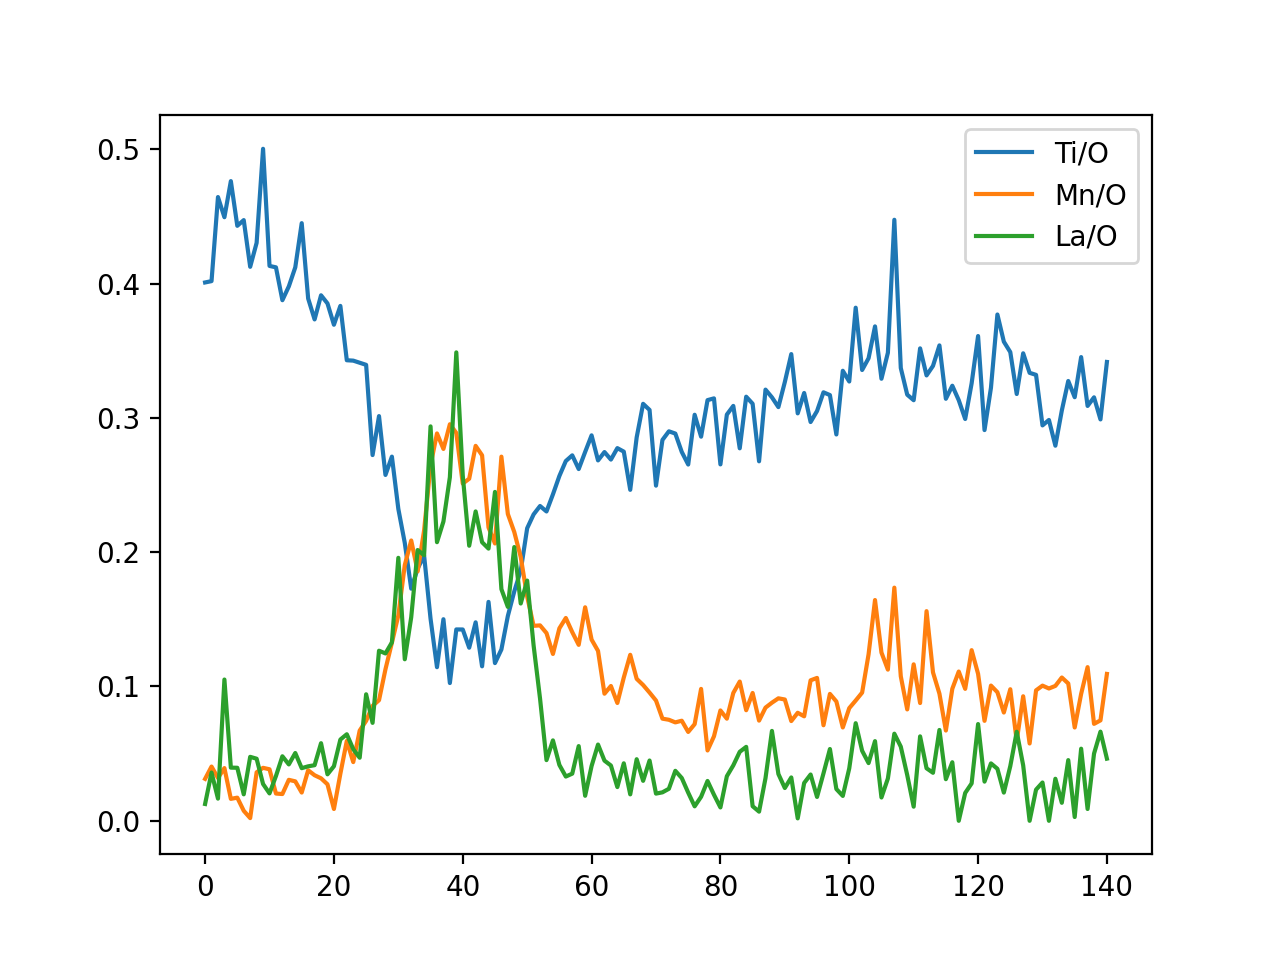

In [299]:
plt.figure()

for key in  line_dict: 
    if key != 'O':
        plt.plot(np.array(line_dict[key])/np.array(line_dict['O']), label=key+'/O')
plt.legend()

In [293]:
print(fit['model'].keys())
plt.close('all')

dict_keys(['background', 'background-poly_0', 'background-poly_1', 'background-poly_2', 'background-A', 'background-r', 'spectrum', 'blurred', 'mask', 'fit_parameter', 'fit_area_start', 'fit_area_end'])


<IPython.core.display.Javascript object>


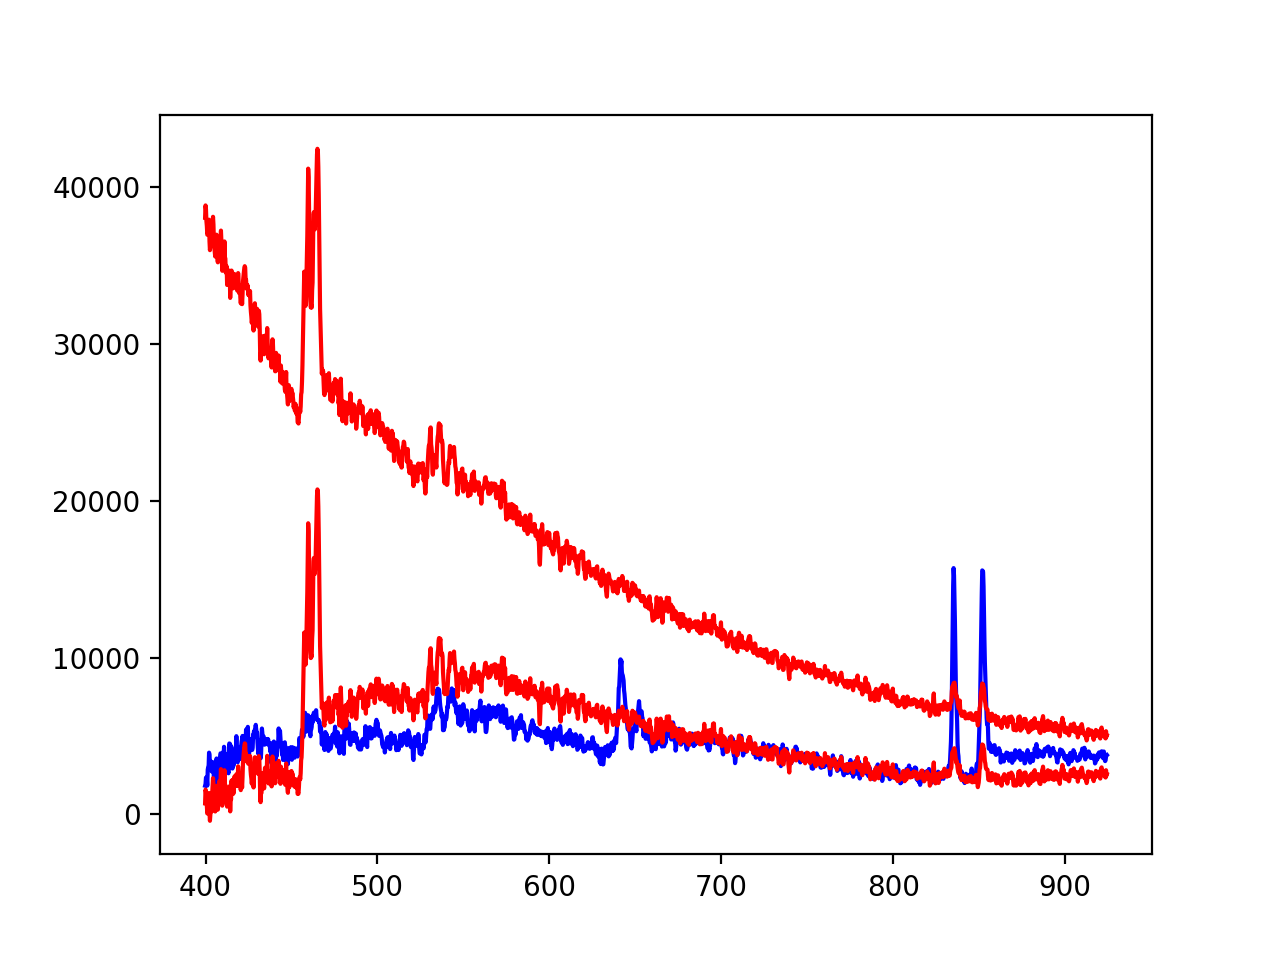

In [318]:

energy_scale = (spectrum_dictionary['energy_scale']-10)*1.025

edges = eels.make_edges(SI_plot2.tags['edges_present'], energy_scale, SI_plot2.tags['acceleration_voltage'], SI_plot2.tags['collection_angle'])
plt.figure()
#plt.plot(energy_scale,results['40']['model']['spectrum'],c='b')

plt.plot(energy_scale,linescan[40,:]-results['40']['model']['background'],c='b')
spectrum = linescan[23,:]
    
fit = eels.fit_edges(spectrum, energy_scale, regions, edges)
plt.plot(energy_scale,spectrum,c='r')
plt.plot(energy_scale,spectrum-fit['model']['background'],c='r')


In [290]:
SI_plot2.do_All(verbose = True)

 row: 0
 row: 1
 row: 2
 row: 3
 row: 4
 row: 5
 row: 6
 row: 7
 row: 8
 row: 9
 row: 10
 row: 11
 row: 12
 row: 13
 row: 14
 row: 15
 row: 16
 row: 17
 row: 18
 row: 19
 row: 20
 row: 21
 row: 22
 row: 23
 row: 24
 row: 25
 row: 26
 row: 27
 row: 28
 row: 29
 row: 30
 row: 31
 row: 32
 row: 33
 row: 34
 row: 35
 row: 36
 row: 37
 row: 38
 row: 39
 row: 40
 row: 41
 row: 42
 row: 43
 row: 44
 row: 45
 row: 46
 row: 47
 row: 48
 row: 49
 row: 50
 row: 51
 row: 52
 row: 53


C:\Users\gduscher\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\minpack.py:454: RuntimeWarning: Number of calls to function has reached maxfev = 2000.
  warnings.warn(errors[info][0], RuntimeWarning)


 row: 54
 row: 55
 row: 56
 row: 57
 row: 58
 row: 59
 row: 60
 row: 61
 row: 62
 row: 63
 row: 64
 row: 65
 row: 66
 row: 67
 row: 68
 row: 69
 row: 70
 row: 71
 row: 72
 row: 73
 row: 74
 row: 75
 row: 76
 row: 77
 row: 78
 row: 79
 row: 80
 row: 81
 row: 82
 row: 83
 row: 84
 row: 85
 row: 86
 row: 87
 row: 88
 row: 89
 row: 90
 row: 91
 row: 92
 row: 93
 row: 94
 row: 95
 row: 96
 row: 97
 row: 98
 row: 99
 row: 100
 row: 101
 row: 102
 row: 103
 row: 104
 row: 105
 row: 106
 row: 107
 row: 108
 row: 109
 row: 110
 row: 111
 row: 112
 row: 113
 row: 114
 row: 115
 row: 116
 row: 117
 row: 118
 row: 119
 row: 120
 row: 121
 row: 122
 row: 123
 row: 124
 row: 125
 row: 126
 row: 127
 row: 128
 row: 129
 row: 130
 row: 131
 row: 132
 row: 133
 row: 134
 row: 135
 row: 136
 row: 137
 row: 138
 row: 139
 row: 140


### Plotting the results:

The results are in the individual spectrum dictionary: 

*SI_plot2.tags['spectra'][f'{x}-{y}']*

The compositional results are in the edge dictionary. Each edge has its own sub-dictionary. The areal_density is the result of the compositional fit. 

So we collect the areal densities of the different edges in numpy arrays.

The arrays are stored in a dictionary *results_dictionary* and then we plot those arrays.



In [144]:
results_dictionary = {}
x = 0
y = 0

# we are only after the edges so it does not matter which spectrum we use
for key in  SI_plot2.tags['spectra']['0-0']['edges']: 
    x = 0
    y = 0

    if key.isdigit():  # only edges have numbers in that dictionary
        results_dictionary[key] = {} # make new dictionary
        print(key)
        
        # store the additional data like element and what edge
        results_dictionary[key]['element'] =SI_plot2.tags['spectra'][f'{x}-{y}']['edges'][key]['element']
        results_dictionary[key]['Z'] =SI_plot2.tags['spectra'][f'{x}-{y}']['edges'][key]['Z']
        results_dictionary[key]['onset'] =SI_plot2.tags['spectra'][f'{x}-{y}']['edges'][key]['onset']
        results_dictionary[key]['symmetry'] =SI_plot2.tags['spectra'][f'{x}-{y}']['edges'][key]['symmetry']
        
        # intitalize data array
        results_dictionary[key]['data'] = np.empty(SI_plot.tags['cube'].shape[0:2])
        # go through all spectra and fill data array pixel.
        for x in range(results_dictionary[key]['data'].shape[0]):
            for y in range(results_dictionary[key]['data'].shape[1]):
                results_dictionary[key]['data'][x,y] = SI_plot2.tags['spectra'][f'{y}-{x}']['edges'][key]['areal_density']

## plot
ax = []; im= [];color_bar = []
fig = plt.figure()
titles = ['Ti/O) [counts]', ' [counts]', 'O [counts]', 'O/(Ti+V)  [rel.]',]
for i, key in enumerate(['1','3','4']):#results_dictionary:     
    ax.append(plt.subplot(1, 3, i+1))
    im.append(ax[-1].imshow((results_dictionary[key]['data']/results_dictionary['2']['data']).T, origin= 'upper', vmax = 1));
    color_bar.append(fig.colorbar(im[-1], ax=ax[-1]))
    color_bar[-1].set_label(results_dictionary[key]['element']+'/O [counts]')
#im[3].set_clim(vmax=8)
plt.tight_layout()




1
2
3
4


<IPython.core.display.Javascript object>

## Dictionary for Log of Fitting Results: Needs to be finished

In [111]:
out_tags = {}
for key1 in edges:
    if key1.isdigit():
        for key2 in edges[key1]:
            out_tags[f"edge_{key1}_{key2}"] = edges[key1][key2]
    else:
        for key2 in edges[key1]:
            out_tags[f"{key1}_{key2}"] = edges[key1][key2]

out_tags['monolayer']= 18.2 #atoms/nm^2
out_tags['X_section_unit'] = 'atoms/nm$^2$'

In [112]:
print(out_tags.keys())

dict_keys(['edge_1_Z', 'edge_1_symmetry', 'edge_1_element', 'edge_1_chemcial_shift', 'edge_1_original_onset', 'edge_1_onset', 'edge_1_start_exclude', 'edge_1_end_exclude', 'edge_1_data', 'edge_2_Z', 'edge_2_symmetry', 'edge_2_element', 'edge_2_chemcial_shift', 'edge_2_original_onset', 'edge_2_onset', 'edge_2_start_exclude', 'edge_2_end_exclude', 'edge_2_data', 'edge_3_Z', 'edge_3_symmetry', 'edge_3_element', 'edge_3_chemcial_shift', 'edge_3_original_onset', 'edge_3_onset', 'edge_3_start_exclude', 'edge_3_end_exclude', 'edge_3_data', 'edge_4_Z', 'edge_4_symmetry', 'edge_4_element', 'edge_4_chemcial_shift', 'edge_4_original_onset', 'edge_4_onset', 'edge_4_start_exclude', 'edge_4_end_exclude', 'edge_4_data', 'monolayer', 'X_section_unit'])


### Log Results

In [113]:
log_group = ft.h5_add_Log(current_channel, name='Xsection_fit')
ft.h5_add_Data2Log(log_group,  out_tags)

TypeError: Not a location id (invalid object ID)

### Check on File Content

In [107]:
import pyUSID as usid 
usid.hdf_utils.print_tree(h5_file)


/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Log_000
      -------
      ├ X_section_unit
      ├ _Xsection_fit
      ├ edge_1_Z
      ├ edge_1_chemcial_shift
      ├ edge_1_data
      ├ edge_1_element
      ├ edge_1_end_exclude
      ├ edge_1_onset
      ├ edge_1_original_onset
      ├ edge_1_start_exclude
      ├ edge_1_symmetry
      ├ edge_2_Z
      ├ edge_2_chemcial_shift
      ├ edge_2_data
      ├ edge_2_element
      ├ edge_2_end_exclude
      ├ edge_2_onset
      ├ edge_2_original_onset
      ├ edge_2_start_exclude
      ├ edge_2_symmetry
      ├ edge_3_Z
      ├ edge_3_chemcial_shift
      ├ edge_3_data
      ├ edge_3_element
      ├ edge_3_end_exclude
      ├ edge_3_onset
      ├ edge_3_original_onset
      ├ edge_3_start_exclude
      ├ edge_3_symmetry
      ├ edge_4_Z
      ├ edge_4_chemcial_shift
      ├ edge_4_data
      ├ edge_4_element
      ├ edge_4_end_exclude
      ├ edge_4_onset
      ├ edge_4_original_onset
      ├ edge_4_start_exclu

## Close File
File needs to be closed to be used with other notebooks

In [108]:
h5_file.close()

## Navigation
### Back: [Calculating Dielectric Function II: Silicon](DielectricDFT2.ipynb)
### Next:  [ELNES](ELNES.ipynb)

### Chapter 4: [Spectroscopy](Spectroscopy.ipynb)
### Index: [Index](Analysis_of_Transmission_Electron_Microscope_Data.ipynb)